### 1: Import Libraries and Data Loading

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set random state and plotting style
np.random.seed(537)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
pip list|grep numpy

Note: you may need to restart the kernel to use updated packages.


'grep'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [6]:
!pip install matplotlib

In [7]:
!pip install seaborn

In [8]:
!pip install scipy

In [9]:
!pip install scikit-learn

### 2: Data Exploration and Quality Assessment

In [10]:
# Load dataset
df = pd.read_csv('synthetic_coffee_health_10000.csv')

print("="*80)
print("COMPREHENSIVE COFFEE HEALTH DATASET ANALYSIS")
print("="*80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df):,}")
print(f"Total Features: {df.shape[1]}")
print("\nDataset loaded successfully!")

COMPREHENSIVE COFFEE HEALTH DATASET ANALYSIS
Dataset Shape: (10000, 16)
Total Records: 10,000
Total Features: 16

Dataset loaded successfully!


### 3: Descriptive Statistics and Initial Insights

In [11]:
print("\n" + "-"*60)
print("DATASET STRUCTURE AND QUALITY ASSESSMENT")
print("-"*60)

# Basic information
df.info()

# Missing values and data quality
missing_data = df.isnull().sum()
print(f"\nMissing Values: {missing_data.sum()} total")



------------------------------------------------------------
DATASET STRUCTURE AND QUALITY ASSESSMENT
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hou

In [12]:
print("Data Quality Score: 100%" if missing_data.sum() == 0 else f"Data Quality Score: {((len(df) * len(df.columns) - missing_data.sum()) / (len(df) * len(df.columns)) * 100):.1f}%")

# Identify variable types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Variables ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Variables ({len(categorical_cols)}): {categorical_cols}")

# Display first few rows
print(f"\nFirst 5 rows of the dataset:")
print(df.head())

Data Quality Score: 96.3%

Numerical Variables (10): ['ID', 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']
Categorical Variables (6): ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

First 5 rows of the dataset:
   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2  

### 4: Distribution Analysis Visualizations

In [13]:
print("\n" + "-"*60)
print("DESCRIPTIVE STATISTICS AND KEY INSIGHTS")
print("-"*60)

# Comprehensive descriptive statistics
desc_stats = df[numerical_cols].describe()
print("Numerical Variables Statistics:")
print(desc_stats.round(2))

# Coffee consumption analysis
coffee_stats = df['Coffee_Intake'].describe()
print(f"\nCoffee Consumption Analysis:")
print(f"  • Average daily consumption: {coffee_stats['mean']:.2f} cups")
print(f"  • Median consumption: {coffee_stats['50%']:.2f} cups")
print(f"  • Standard deviation: {coffee_stats['std']:.2f}")
print(f"  • Range: {coffee_stats['min']:.2f} - {coffee_stats['max']:.2f} cups")
print(f"  • Interquartile Range: {coffee_stats['75%'] - coffee_stats['25%']:.2f}")

# Health metrics overview
print(f"\nHealth Metrics Overview:")
print(f"  • Average BMI: {df['BMI'].mean():.1f} (Normal: 18.5-24.9)")
print(f"  • Average sleep hours: {df['Sleep_Hours'].mean():.1f} hours")
print(f"  • Average heart rate: {df['Heart_Rate'].mean():.0f} bpm")
print(f"  • Average physical activity: {df['Physical_Activity_Hours'].mean():.1f} hours/week")

# Categorical variables summary
print(f"\nCategorical Variables Summary:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    most_common = df[col].value_counts().index[0]
    print(f"  • {col}: {unique_count} categories, most common: {most_common}")


------------------------------------------------------------
DESCRIPTIVE STATISTICS AND KEY INSIGHTS
------------------------------------------------------------
Numerical Variables Statistics:
             ID       Age  Coffee_Intake  Caffeine_mg  Sleep_Hours       BMI  \
count  10000.00  10000.00       10000.00     10000.00     10000.00  10000.00   
mean    5000.50     34.95           2.51       238.41         6.64     23.99   
std     2886.90     11.16           1.45       137.75         1.22      3.91   
min        1.00     18.00           0.00         0.00         3.00     15.00   
25%     2500.75     26.00           1.50       138.75         5.80     21.30   
50%     5000.50     34.00           2.50       235.40         6.60     24.00   
75%     7500.25     43.00           3.50       332.02         7.50     26.60   
max    10000.00     80.00           8.20       780.30        10.00     38.20   

       Heart_Rate  Physical_Activity_Hours  Smoking  Alcohol_Consumption  
count    

### 5: Correlation Analysis and Heatmap

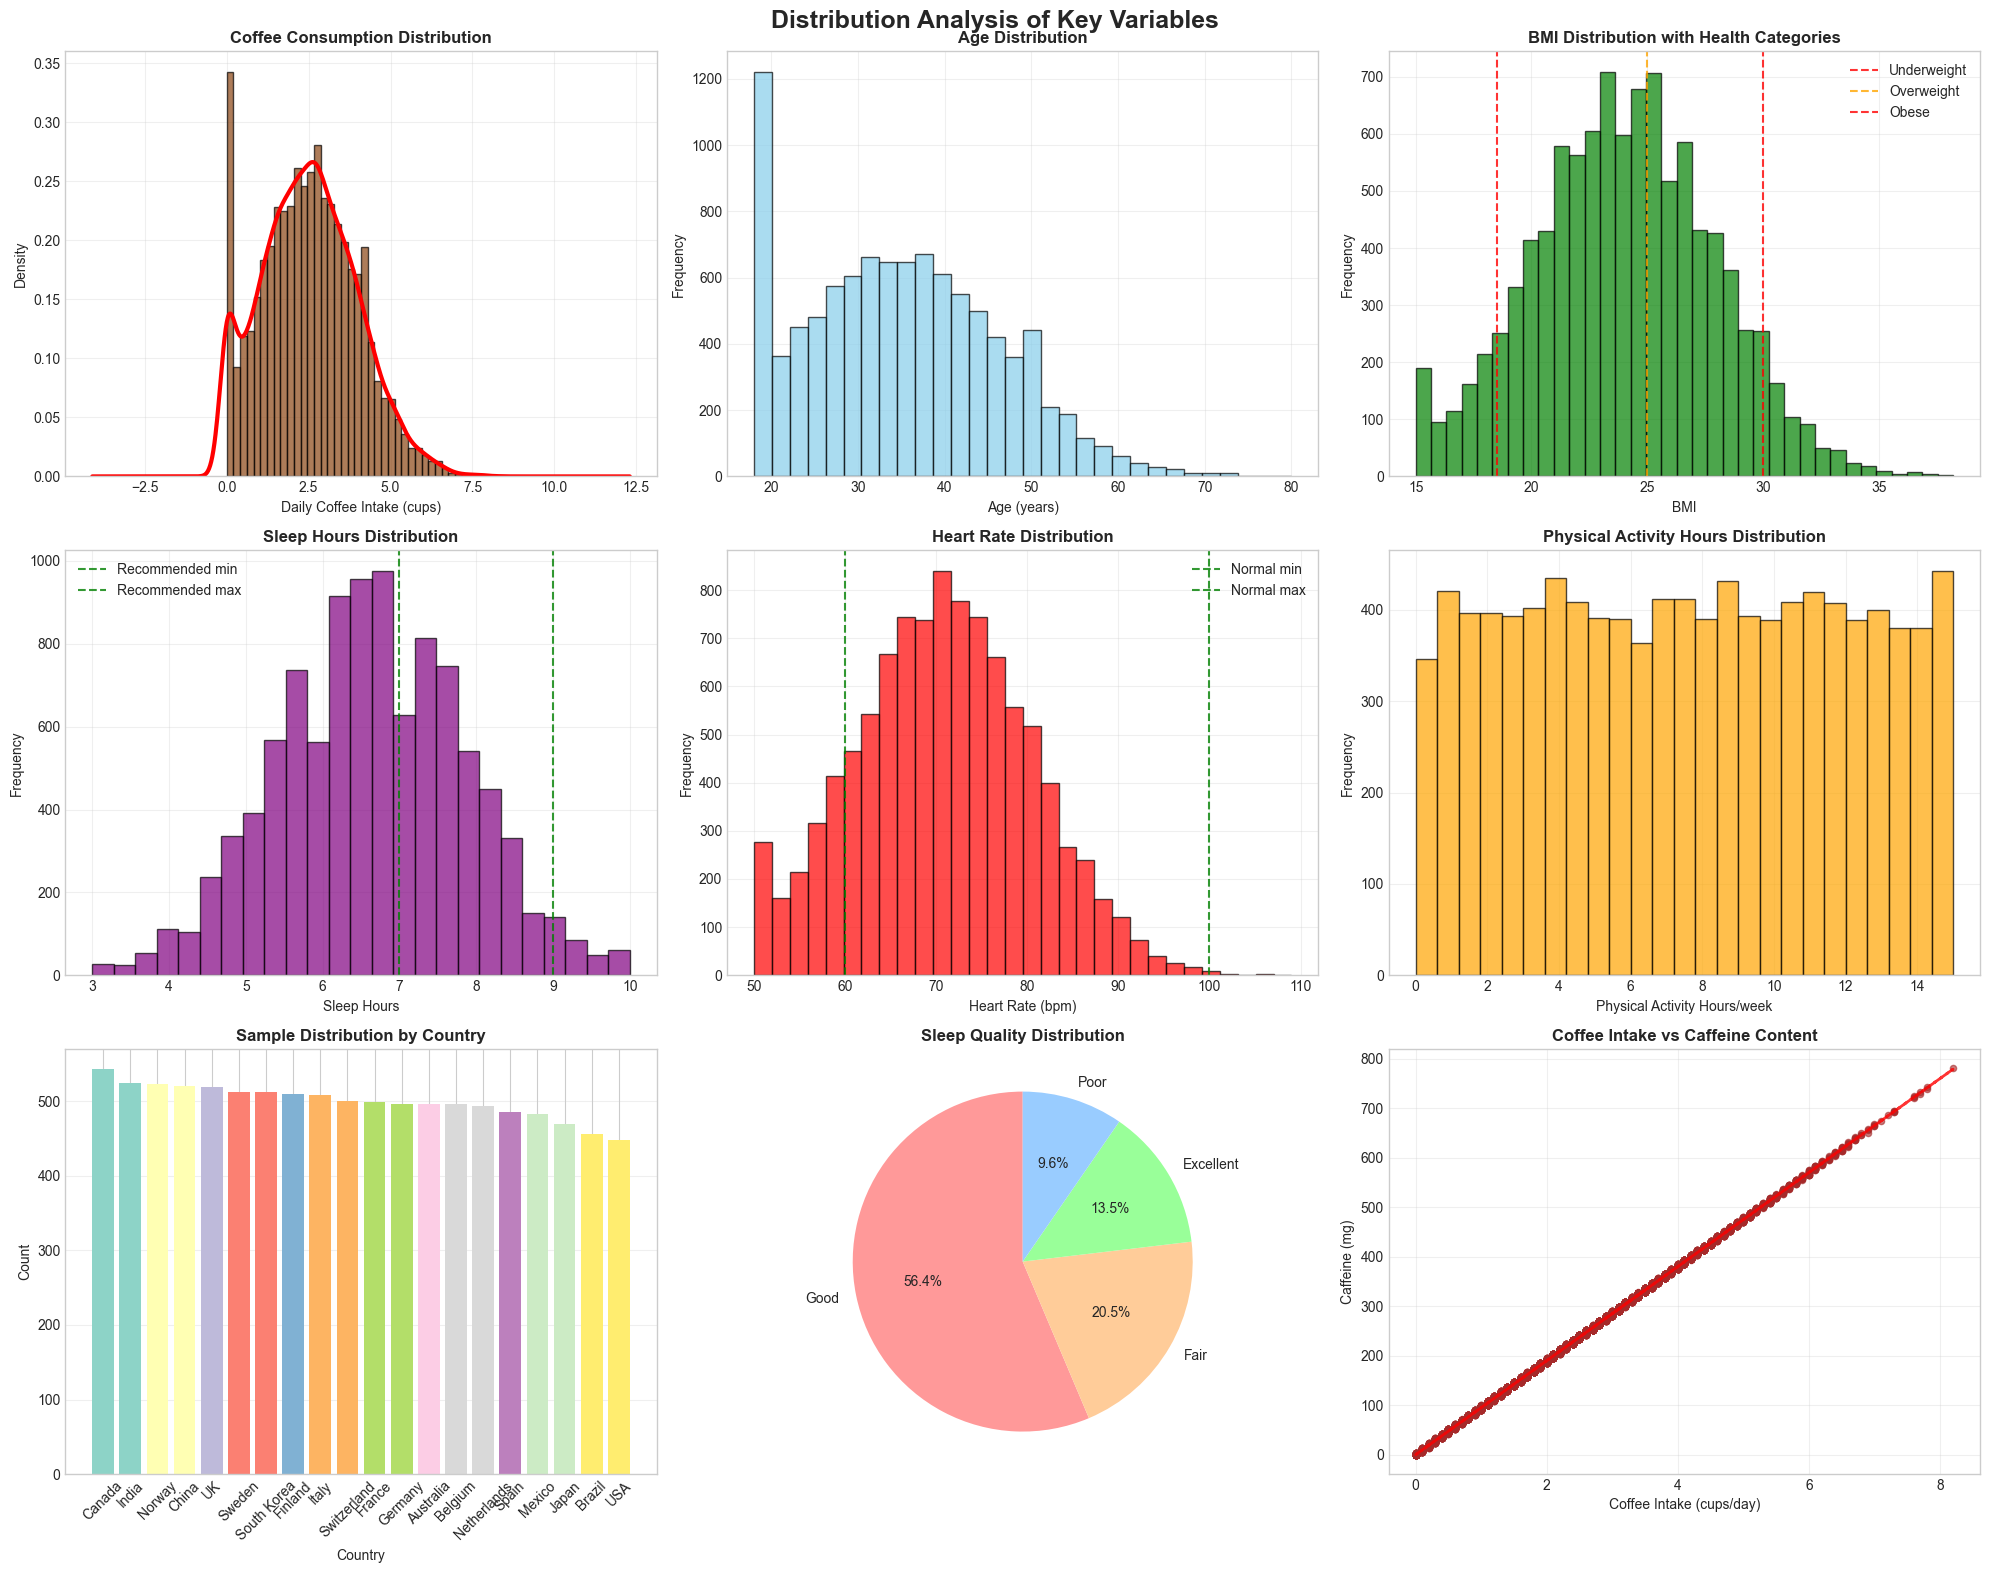

In [14]:
# Create comprehensive distribution plots
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=18, fontweight='bold', y=0.98)

# Coffee Intake Distribution with KDE
axes[0,0].hist(df['Coffee_Intake'], bins=40, alpha=0.7, color='#8B4513', density=True, edgecolor='black')
df['Coffee_Intake'].plot.kde(ax=axes[0,0], color='red', linewidth=3)
axes[0,0].set_title('Coffee Consumption Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Daily Coffee Intake (cups)')
axes[0,0].set_ylabel('Density')
axes[0,0].grid(True, alpha=0.3)

# Age Distribution
axes[0,1].hist(df['Age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Age (years)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# BMI Distribution with health categories
axes[0,2].hist(df['BMI'], bins=35, alpha=0.7, color='green', edgecolor='black')
axes[0,2].axvline(18.5, color='red', linestyle='--', alpha=0.8, label='Underweight')
axes[0,2].axvline(25, color='orange', linestyle='--', alpha=0.8, label='Overweight')
axes[0,2].axvline(30, color='red', linestyle='--', alpha=0.8, label='Obese')
axes[0,2].set_title('BMI Distribution with Health Categories', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('BMI')
axes[0,2].set_ylabel('Frequency')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Sleep Hours Distribution
axes[1,0].hist(df['Sleep_Hours'], bins=25, alpha=0.7, color='purple', edgecolor='black')
axes[1,0].axvline(7, color='green', linestyle='--', alpha=0.8, label='Recommended min')
axes[1,0].axvline(9, color='green', linestyle='--', alpha=0.8, label='Recommended max')
axes[1,0].set_title('Sleep Hours Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Sleep Hours')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Heart Rate Distribution
axes[1,1].hist(df['Heart_Rate'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1,1].axvline(60, color='green', linestyle='--', alpha=0.8, label='Normal min')
axes[1,1].axvline(100, color='green', linestyle='--', alpha=0.8, label='Normal max')
axes[1,1].set_title('Heart Rate Distribution', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Heart Rate (bpm)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Physical Activity Distribution
axes[1,2].hist(df['Physical_Activity_Hours'], bins=25, alpha=0.7, color='orange', edgecolor='black')
axes[1,2].set_title('Physical Activity Hours Distribution', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Physical Activity Hours/week')
axes[1,2].set_ylabel('Frequency')
axes[1,2].grid(True, alpha=0.3)

# Country Distribution
country_counts = df['Country'].value_counts()
bars = axes[2,0].bar(country_counts.index, country_counts.values, 
                     color=plt.cm.Set3(np.linspace(0, 1, len(country_counts))))
axes[2,0].set_title('Sample Distribution by Country', fontsize=12, fontweight='bold')
axes[2,0].set_xlabel('Country')
axes[2,0].set_ylabel('Count')
axes[2,0].tick_params(axis='x', rotation=45)
axes[2,0].grid(True, alpha=0.3, axis='y')

# Sleep Quality Distribution
sleep_counts = df['Sleep_Quality'].value_counts()
colors = ['#ff9999', '#ffcc99', '#99ff99', '#99ccff']
wedges, texts, autotexts = axes[2,1].pie(sleep_counts.values, labels=sleep_counts.index, 
                                        autopct='%1.1f%%', colors=colors, startangle=90)
axes[2,1].set_title('Sleep Quality Distribution', fontsize=12, fontweight='bold')

# Caffeine vs Coffee Intake
axes[2,2].scatter(df['Coffee_Intake'], df['Caffeine_mg'], alpha=0.6, c='brown', s=20)
z = np.polyfit(df['Coffee_Intake'], df['Caffeine_mg'], 1)
p = np.poly1d(z)
axes[2,2].plot(df['Coffee_Intake'], p(df['Coffee_Intake']), "r--", alpha=0.8, linewidth=2)
axes[2,2].set_title('Coffee Intake vs Caffeine Content', fontsize=12, fontweight='bold')
axes[2,2].set_xlabel('Coffee Intake (cups/day)')
axes[2,2].set_ylabel('Caffeine (mg)')
axes[2,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

###  5: Correlation Analysis and Heatmap


CORRELATION ANALYSIS


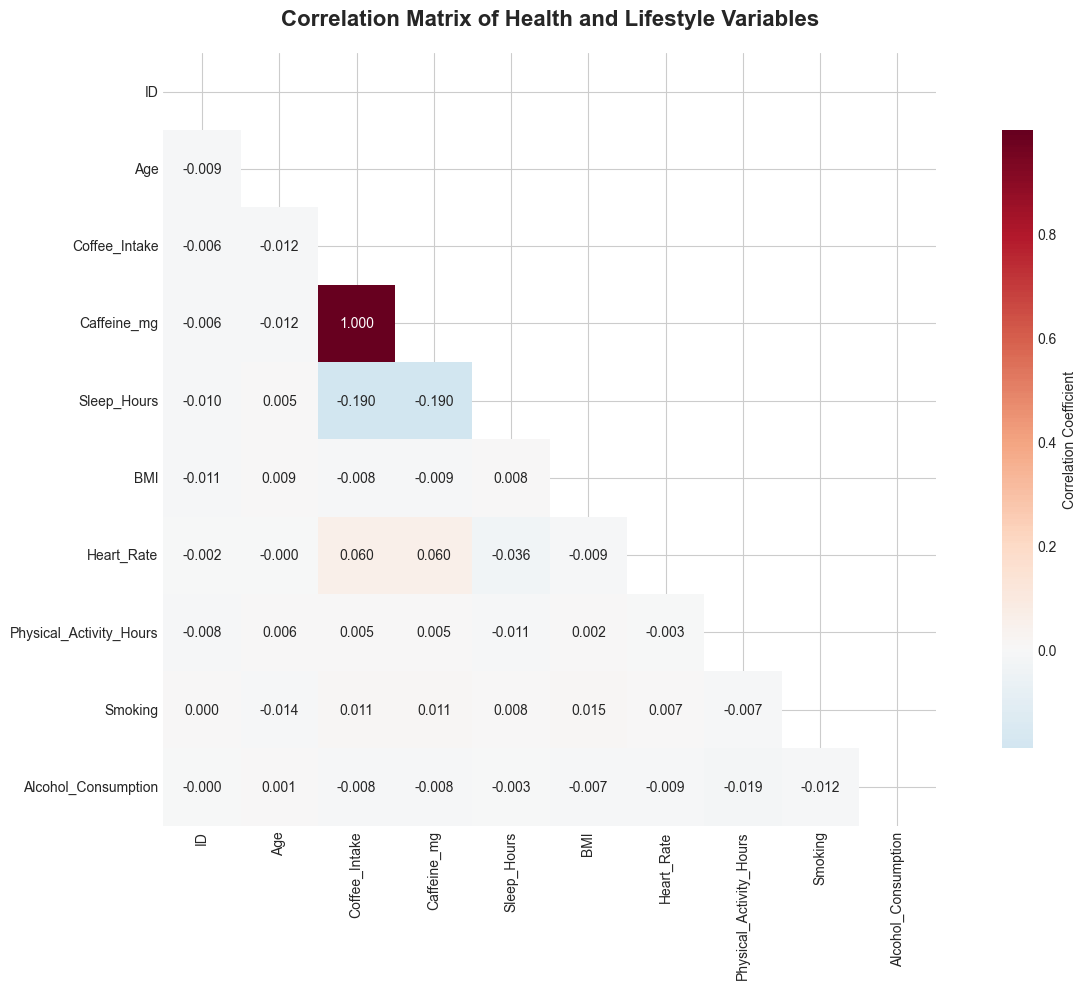

Strong Correlations Analysis (|r| > 0.3):
--------------------------------------------------
  • Coffee_Intake ↔ Caffeine_mg: 1.000 (very strong positive)

Coffee Intake Correlations:
------------------------------
  • Caffeine_mg: 1.000 ↑
  • Sleep_Hours: -0.190 ↓
  • Heart_Rate: 0.060 ↑
  • Age: -0.012 ↓
  • Smoking: 0.011 ↑


In [15]:
# Comprehensive correlation analysis
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', 
            center=0, square=True, fmt='.3f',
            cbar_kws={"shrink": .8, "label": "Correlation Coefficient"})
plt.title('Correlation Matrix of Health and Lifestyle Variables', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify and report strong correlations
print("Strong Correlations Analysis (|r| > 0.3):")
print("-" * 50)
strong_correlations = []
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.3:
            strong_correlations.append((numerical_cols[i], numerical_cols[j], corr))

for var1, var2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
    direction = "positive" if corr > 0 else "negative"
    strength = "very strong" if abs(corr) > 0.7 else "strong" if abs(corr) > 0.5 else "moderate"
    print(f"  • {var1} ↔ {var2}: {corr:.3f} ({strength} {direction})")

# Coffee-specific correlations
print(f"\nCoffee Intake Correlations:")
print("-" * 30)
coffee_corrs = correlation_matrix['Coffee_Intake'].abs().sort_values(ascending=False)[1:]  # Exclude self-correlation
for var, corr in coffee_corrs.head(5).items():
    actual_corr = correlation_matrix['Coffee_Intake'][var]
    direction = "↑" if actual_corr > 0 else "↓"
    print(f"  • {var}: {actual_corr:.3f} {direction}")

### 6: Advanced Relationship Analysis

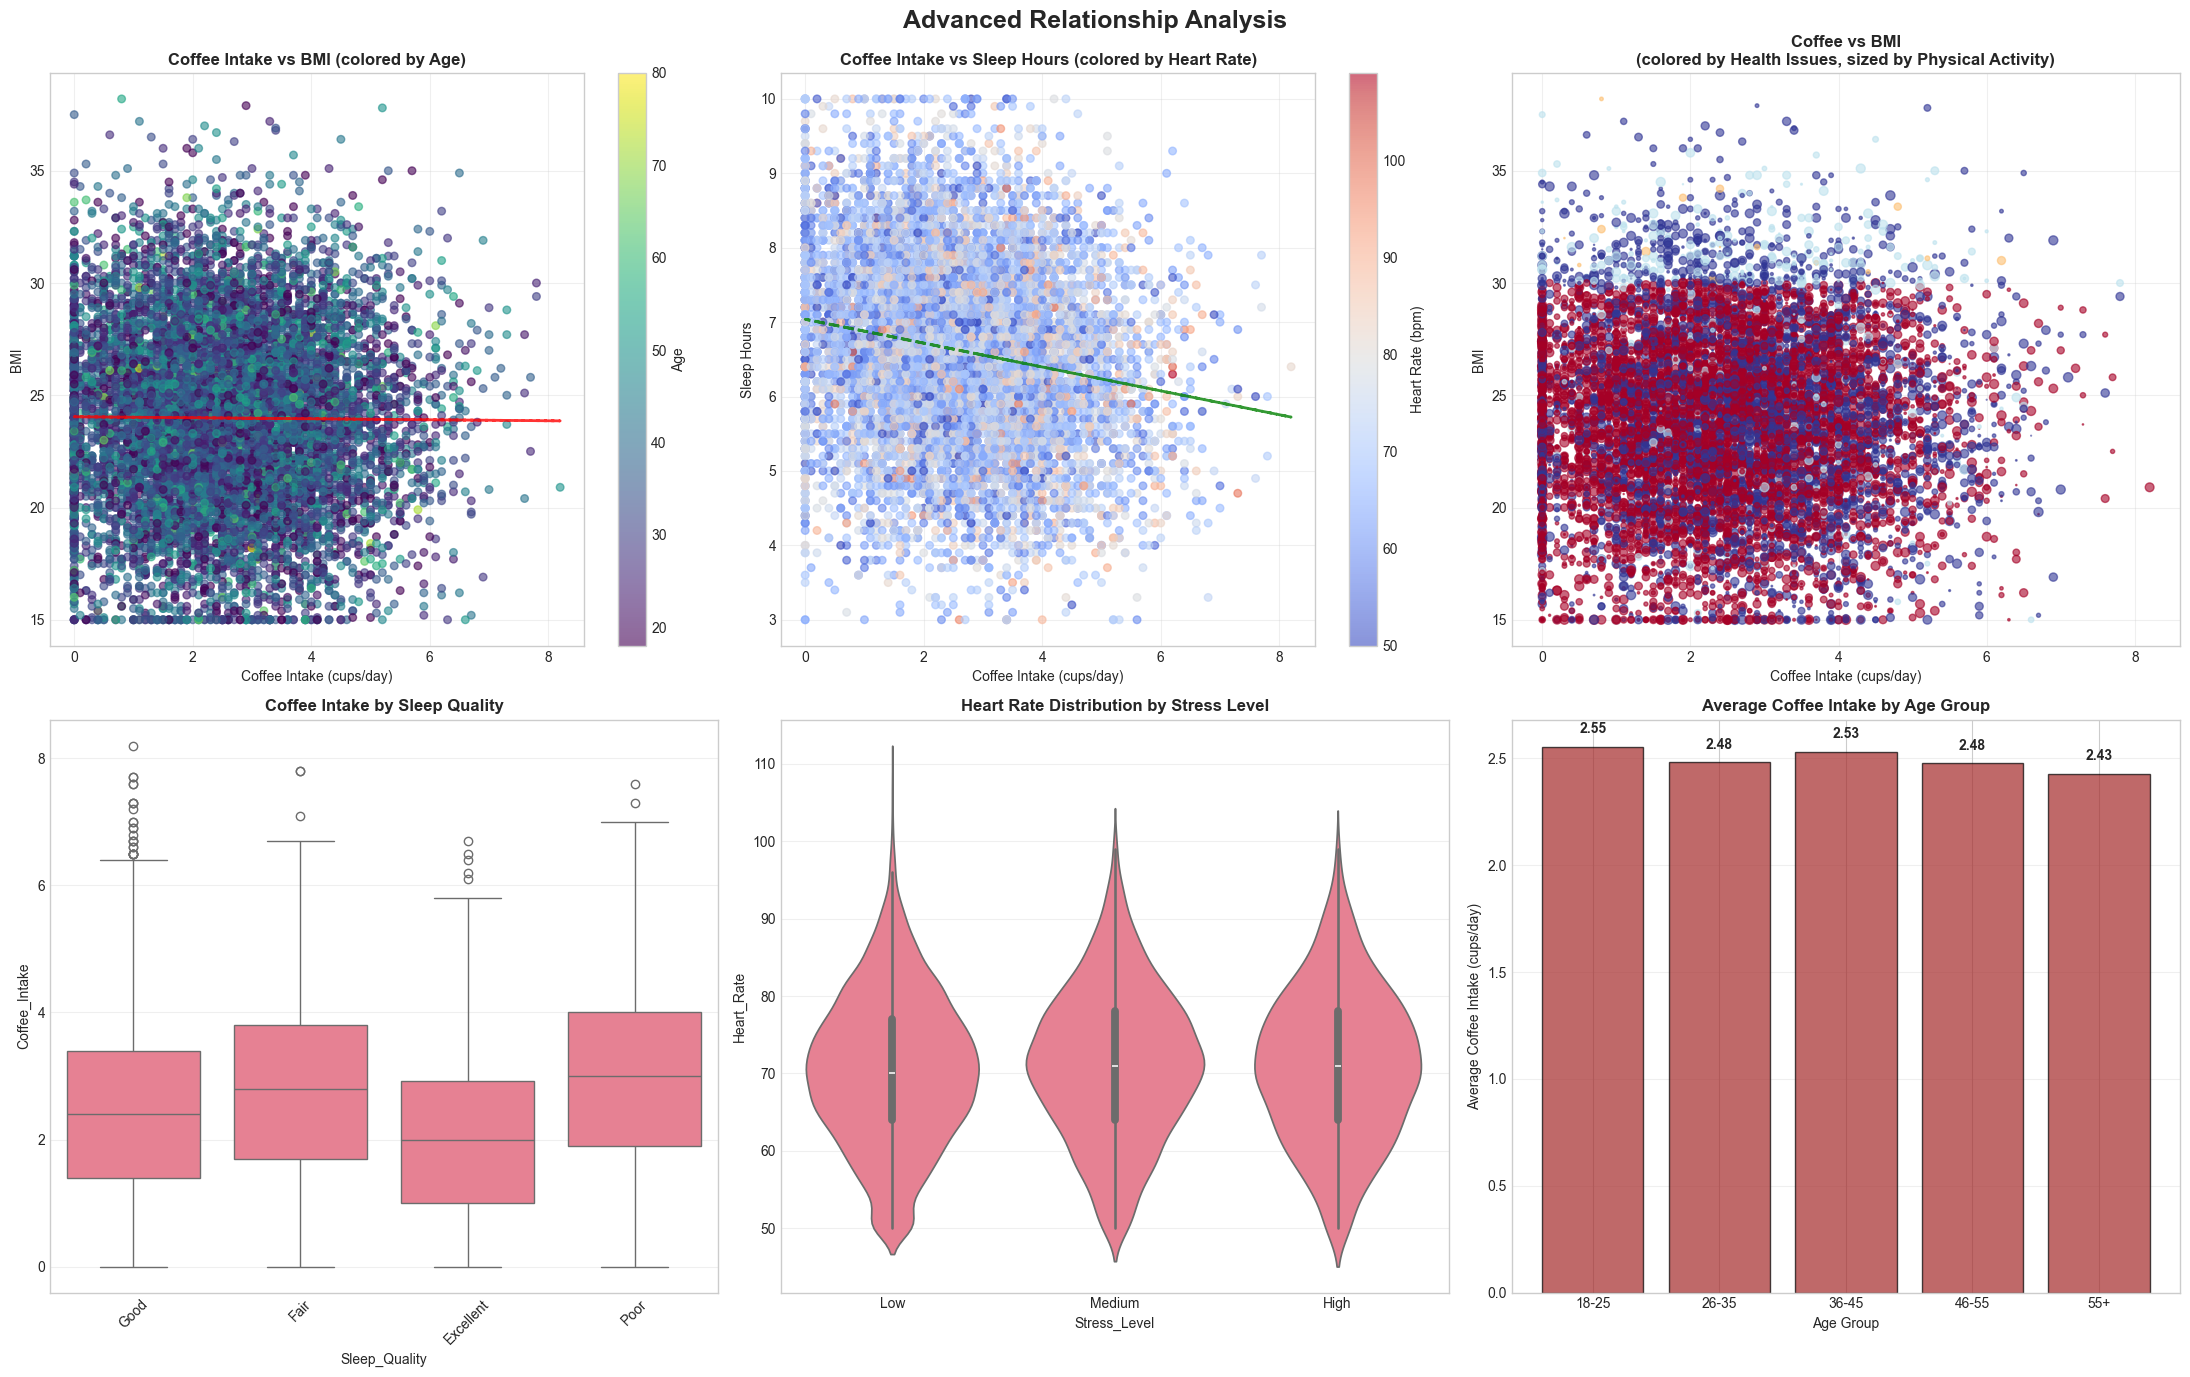

In [16]:
# Create advanced relationship visualizations
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
fig.suptitle('Advanced Relationship Analysis', fontsize=18, fontweight='bold')

# 1. Coffee vs Health Metrics with trend lines
ax1 = axes[0,0]
scatter = ax1.scatter(df['Coffee_Intake'], df['BMI'], c=df['Age'], 
                     cmap='viridis', alpha=0.6, s=30)
z = np.polyfit(df['Coffee_Intake'], df['BMI'], 1)
p = np.poly1d(z)
ax1.plot(df['Coffee_Intake'], p(df['Coffee_Intake']), "r--", alpha=0.8, linewidth=2)
ax1.set_title('Coffee Intake vs BMI (colored by Age)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Coffee Intake (cups/day)')
ax1.set_ylabel('BMI')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Age')

# 2. Sleep patterns analysis
ax2 = axes[0,1]
scatter2 = ax2.scatter(df['Coffee_Intake'], df['Sleep_Hours'], 
                      c=df['Heart_Rate'], cmap='coolwarm', alpha=0.6, s=30)
z2 = np.polyfit(df['Coffee_Intake'], df['Sleep_Hours'], 1)
p2 = np.poly1d(z2)
ax2.plot(df['Coffee_Intake'], p2(df['Coffee_Intake']), "g--", alpha=0.8, linewidth=2)
ax2.set_title('Coffee Intake vs Sleep Hours (colored by Heart Rate)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Coffee Intake (cups/day)')
ax2.set_ylabel('Sleep Hours')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Heart Rate (bpm)')

# 3. Multi-dimensional health analysis
ax3 = axes[0,2]
health_issues_numeric = LabelEncoder().fit_transform(df['Health_Issues'])
scatter3 = ax3.scatter(df['Coffee_Intake'], df['BMI'], 
                      c=health_issues_numeric, s=df['Physical_Activity_Hours']*3,
                      alpha=0.6, cmap='RdYlBu_r')
ax3.set_title('Coffee vs BMI\n(colored by Health Issues, sized by Physical Activity)', 
              fontsize=12, fontweight='bold')
ax3.set_xlabel('Coffee Intake (cups/day)')
ax3.set_ylabel('BMI')
ax3.grid(True, alpha=0.3)

# 4. Box plots for categorical analysis
sns.boxplot(data=df, x='Sleep_Quality', y='Coffee_Intake', ax=axes[1,0])
axes[1,0].set_title('Coffee Intake by Sleep Quality', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3, axis='y')

# 5. Violin plots for distribution analysis
sns.violinplot(data=df, x='Stress_Level', y='Heart_Rate', ax=axes[1,1])
axes[1,1].set_title('Heart Rate Distribution by Stress Level', fontsize=12, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')

# 6. Age group analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])
age_coffee = df.groupby('Age_Group')['Coffee_Intake'].mean()
bars = axes[1,2].bar(age_coffee.index, age_coffee.values, 
                    color='brown', alpha=0.7, edgecolor='black')
axes[1,2].set_title('Average Coffee Intake by Age Group', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Age Group')
axes[1,2].set_ylabel('Average Coffee Intake (cups/day)')
axes[1,2].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, age_coffee.values):
    axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                  f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 7: Statistical Testing

In [17]:
print("\n" + "="*80)
print("STATISTICAL HYPOTHESIS TESTING")
print("="*80)

# ANOVA tests for categorical variables
print("ANOVA Results (Coffee Intake across categories):")
print("-" * 50)

categorical_tests = ['Country', 'Gender', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']
anova_results = []

for cat in categorical_tests:
    groups = [group['Coffee_Intake'].values for name, group in df.groupby(cat)]
    f_stat, p_value = stats.f_oneway(*groups)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    anova_results.append((cat, f_stat, p_value, significance))
    print(f"  • {cat}: F={f_stat:.2f}, p={p_value:.4f} {significance}")

# Correlation significance tests
print(f"\nCorrelation Significance Tests (Coffee Intake):")
print("-" * 50)
for col in ['BMI', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours', 'Age']:
    corr_coef, p_value = stats.pearsonr(df['Coffee_Intake'], df[col])
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"  • Coffee_Intake vs {col}: r={corr_coef:.3f}, p={p_value:.4f} {significance}")

# T-tests for binary comparisons
print(f"\nT-tests for Binary Comparisons:")
print("-" * 40)

# Gender comparison
male_coffee = df[df['Gender'] == 'Male']['Coffee_Intake']
female_coffee = df[df['Gender'] == 'Female']['Coffee_Intake']
t_stat, p_value = stats.ttest_ind(male_coffee, female_coffee)
significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
print(f"  • Male vs Female coffee intake: t={t_stat:.3f}, p={p_value:.4f} {significance}")
print(f"    Male mean: {male_coffee.mean():.2f}, Female mean: {female_coffee.mean():.2f}")

# Smoking comparison
smoker_coffee = df[df['Smoking'] == 1]['Coffee_Intake']
nonsmoker_coffee = df[df['Smoking'] == 0]['Coffee_Intake']
t_stat, p_value = stats.ttest_ind(smoker_coffee, nonsmoker_coffee)
significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
print(f"  • Smoker vs Non-smoker: t={t_stat:.3f}, p={p_value:.4f} {significance}")
print(f"    Smoker mean: {smoker_coffee.mean():.2f}, Non-smoker mean: {nonsmoker_coffee.mean():.2f}")


STATISTICAL HYPOTHESIS TESTING
ANOVA Results (Coffee Intake across categories):
--------------------------------------------------
  • Country: F=0.82, p=0.6894 ns
  • Gender: F=0.37, p=0.6916 ns
  • Sleep_Quality: F=106.92, p=0.0000 ***
  • Stress_Level: F=117.09, p=0.0000 ***
  • Health_Issues: F=1.38, p=0.2506 ns
  • Occupation: F=0.41, p=0.8016 ns

Correlation Significance Tests (Coffee Intake):
--------------------------------------------------
  • Coffee_Intake vs BMI: r=-0.008, p=0.4049 ns
  • Coffee_Intake vs Sleep_Hours: r=-0.190, p=0.0000 ***
  • Coffee_Intake vs Heart_Rate: r=0.060, p=0.0000 ***
  • Coffee_Intake vs Physical_Activity_Hours: r=0.005, p=0.6326 ns
  • Coffee_Intake vs Age: r=-0.012, p=0.2242 ns

T-tests for Binary Comparisons:
----------------------------------------
  • Male vs Female coffee intake: t=0.835, p=0.4035 ns
    Male mean: 2.52, Female mean: 2.50
  • Smoker vs Non-smoker: t=1.084, p=0.2786 ns
    Smoker mean: 2.54, Non-smoker mean: 2.50


###  8: Country and Demographic Analysis


COUNTRY AND DEMOGRAPHIC ANALYSIS
Country Rankings by Coffee Consumption:
--------------------------------------------------
 1. Spain           - 2.60 cups/day (n=486.0)
 2. Norway          - 2.59 cups/day (n=523.0)
 3. UK              - 2.58 cups/day (n=519.0)
 4. China           - 2.57 cups/day (n=521.0)
 5. USA             - 2.56 cups/day (n=448.0)
 6. Brazil          - 2.55 cups/day (n=456.0)
 7. Australia       - 2.54 cups/day (n=497.0)
 8. Switzerland     - 2.54 cups/day (n=500.0)
 9. Japan           - 2.53 cups/day (n=469.0)
10. France          - 2.53 cups/day (n=499.0)
11. India           - 2.50 cups/day (n=524.0)
12. Canada          - 2.50 cups/day (n=543.0)
13. Finland         - 2.48 cups/day (n=510.0)
14. Germany         - 2.47 cups/day (n=497.0)
15. South Korea     - 2.46 cups/day (n=512.0)
16. Netherlands     - 2.46 cups/day (n=494.0)
17. Mexico          - 2.45 cups/day (n=483.0)
18. Italy           - 2.44 cups/day (n=509.0)
19. Sweden          - 2.42 cups/day (n=513.0)
2

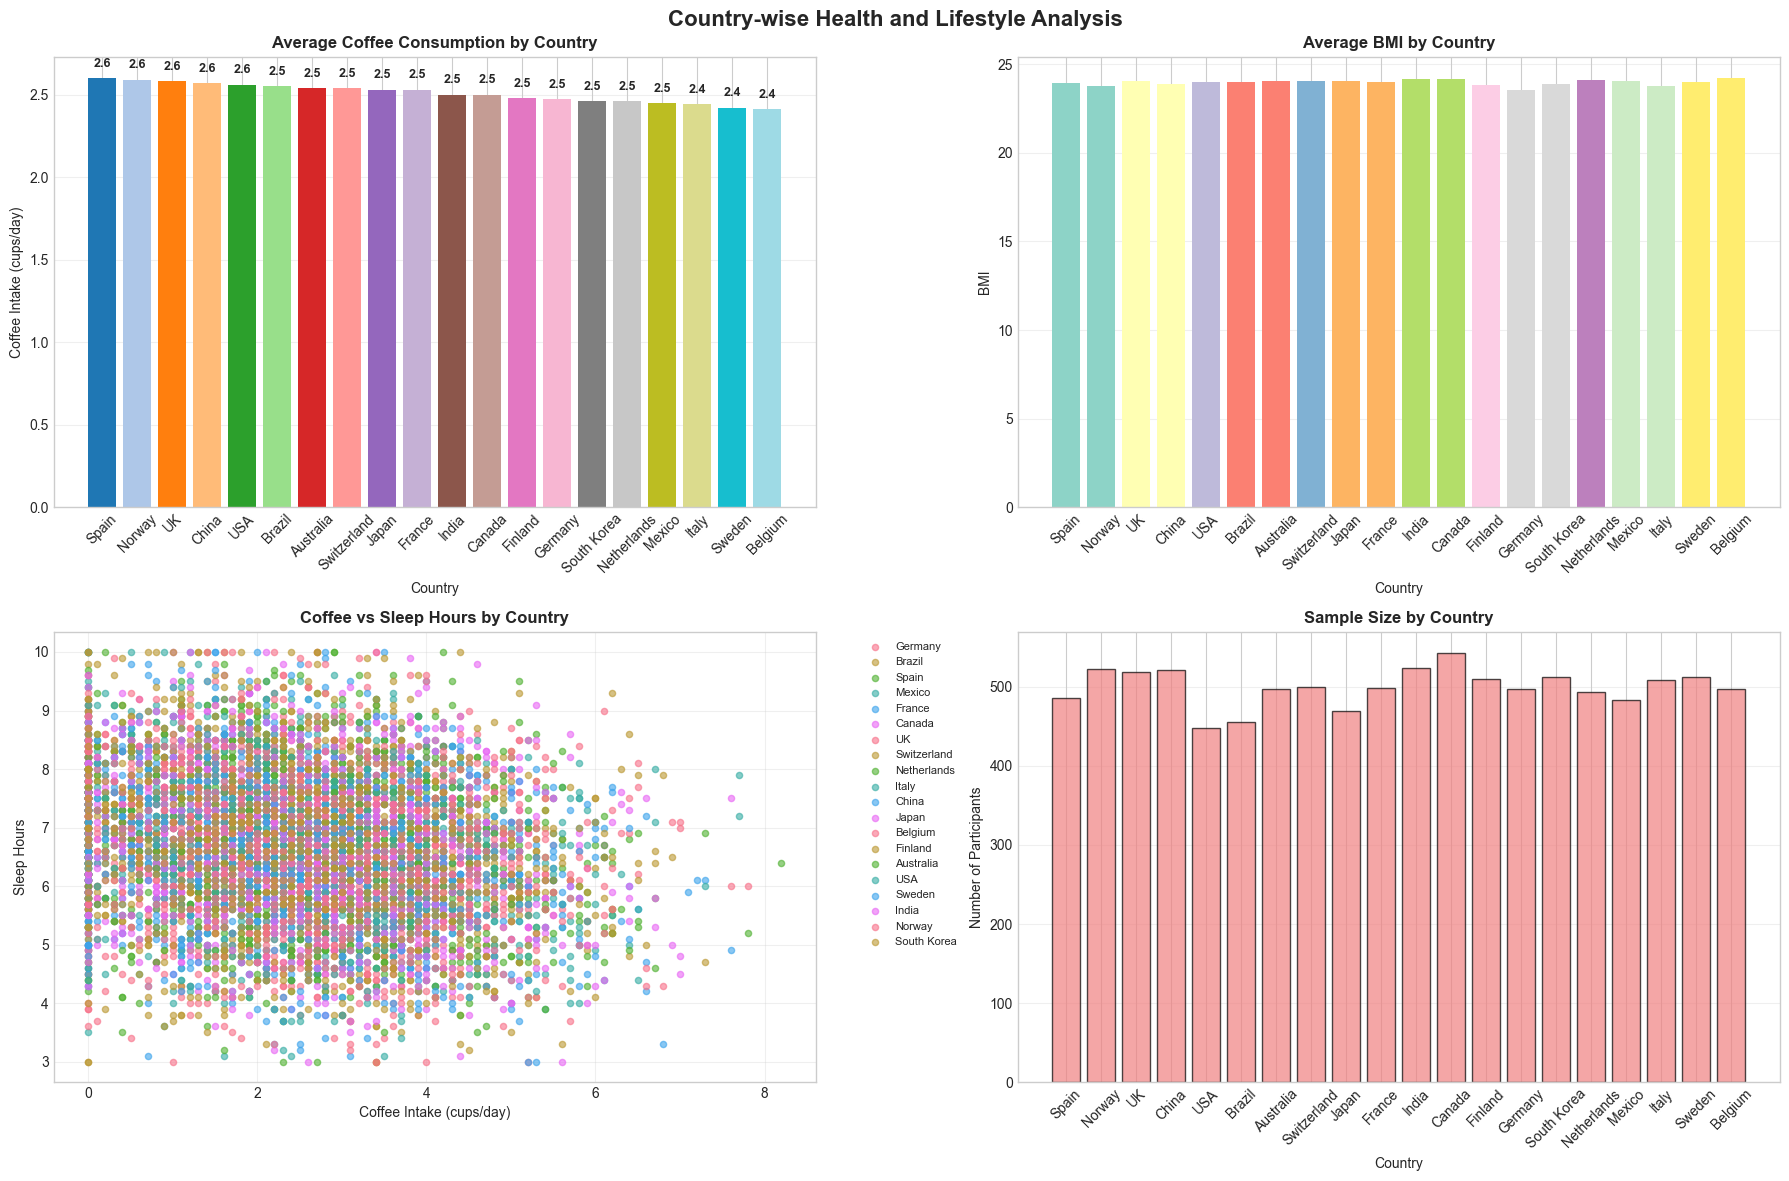


Gender Analysis:
--------------------
Male (n=4773):
  • Coffee: 2.52 ± 1.45 cups/day
  • Age: 34.9 years
  • BMI: 24.0
  • Sleep: 6.6 hours
Female (n=5001):
  • Coffee: 2.50 ± 1.45 cups/day
  • Age: 35.0 years
  • BMI: 24.0
  • Sleep: 6.6 hours
Other (n=226):
  • Coffee: 2.49 ± 1.52 cups/day
  • Age: 34.5 years
  • BMI: 23.9
  • Sleep: 6.6 hours

Age Group Analysis:
--------------------
18-25: 2.55 ± 1.46 cups/day (n=2293.0)
26-35: 2.48 ± 1.46 cups/day (n=3053.0)
36-45: 2.53 ± 1.45 cups/day (n=2853.0)
46-55: 2.48 ± 1.43 cups/day (n=1408.0)
55+: 2.43 ± 1.42 cups/day (n=393.0)


In [18]:
# Comprehensive country and demographic analysis
print("\n" + "="*80)
print("COUNTRY AND DEMOGRAPHIC ANALYSIS")
print("="*80)

# Country statistics
country_stats = df.groupby('Country').agg({
    'Coffee_Intake': ['mean', 'std', 'count'],
    'BMI': 'mean',
    'Sleep_Hours': 'mean',
    'Heart_Rate': 'mean',
    'Physical_Activity_Hours': 'mean'
}).round(2)

country_stats.columns = ['Coffee_Mean', 'Coffee_Std', 'Sample_Size', 'BMI_Mean', 
                        'Sleep_Mean', 'HeartRate_Mean', 'Activity_Mean']
country_stats = country_stats.sort_values('Coffee_Mean', ascending=False)

print("Country Rankings by Coffee Consumption:")
print("-" * 50)
for idx, (country, row) in enumerate(country_stats.iterrows(), 1):
    print(f"{idx:2}. {country:15} - {row['Coffee_Mean']:.2f} cups/day (n={row['Sample_Size']})")

# Create country analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Country-wise Health and Lifestyle Analysis', fontsize=16, fontweight='bold')

# Coffee consumption by country
bars1 = axes[0,0].bar(country_stats.index, country_stats['Coffee_Mean'], 
                     color=plt.cm.tab20(np.linspace(0, 1, len(country_stats))))
axes[0,0].set_title('Average Coffee Consumption by Country', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Country')
axes[0,0].set_ylabel('Coffee Intake (cups/day)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars1, country_stats['Coffee_Mean']):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                  f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# BMI by country
bars2 = axes[0,1].bar(country_stats.index, country_stats['BMI_Mean'], 
                     color=plt.cm.Set3(np.linspace(0, 1, len(country_stats))))
axes[0,1].set_title('Average BMI by Country', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Country')
axes[0,1].set_ylabel('BMI')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3, axis='y')

# Sleep and coffee relationship by country
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    axes[1,0].scatter(country_data['Coffee_Intake'], country_data['Sleep_Hours'], 
                     label=country, alpha=0.6, s=20)
axes[1,0].set_title('Coffee vs Sleep Hours by Country', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Coffee Intake (cups/day)')
axes[1,0].set_ylabel('Sleep Hours')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1,0].grid(True, alpha=0.3)

# Sample size by country
bars3 = axes[1,1].bar(country_stats.index, country_stats['Sample_Size'], 
                     color='lightcoral', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Sample Size by Country', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Country')
axes[1,1].set_ylabel('Number of Participants')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Gender and age analysis
print(f"\nGender Analysis:")
print("-" * 20)
gender_stats = df.groupby('Gender').agg({
    'Coffee_Intake': ['mean', 'std'],
    'Age': 'mean',
    'BMI': 'mean',
    'Sleep_Hours': 'mean'
}).round(2)

for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    print(f"{gender} (n={len(gender_data)}):")
    print(f"  • Coffee: {gender_data['Coffee_Intake'].mean():.2f} ± {gender_data['Coffee_Intake'].std():.2f} cups/day")
    print(f"  • Age: {gender_data['Age'].mean():.1f} years")
    print(f"  • BMI: {gender_data['BMI'].mean():.1f}")
    print(f"  • Sleep: {gender_data['Sleep_Hours'].mean():.1f} hours")

# Age group analysis
print(f"\nAge Group Analysis:")
print("-" * 20)
age_group_stats = df.groupby('Age_Group')['Coffee_Intake'].agg(['mean', 'std', 'count']).round(2)
for age_group, stats in age_group_stats.iterrows():
    print(f"{age_group}: {stats['mean']:.2f} ± {stats['std']:.2f} cups/day (n={stats['count']})")

###  9: Machine Learning - Data Preparation

In [19]:
print("\n" + "="*80)
print("MACHINE LEARNING ANALYSIS - DATA PREPARATION")
print("="*80)

# Create ML-ready dataset
df_ml = df.copy()

# Encode categorical variables
le_dict = {}
encoded_cols = []

for col in categorical_cols:
    le = LabelEncoder()
    encoded_col = col + '_encoded'
    df_ml[encoded_col] = le.fit_transform(df_ml[col])
    le_dict[col] = le
    encoded_cols.append(encoded_col)
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Define feature sets for different ML tasks
features_for_coffee_prediction = ['Age', 'BMI', 'Sleep_Hours', 'Heart_Rate', 
                                 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption'] + encoded_cols

features_for_health_prediction = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 
                                 'BMI', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']

# Create target variables for classification
df_ml['High_Coffee_Consumer'] = (df_ml['Coffee_Intake'] > df_ml['Coffee_Intake'].quantile(0.75)).astype(int)
df_ml['Poor_Sleep'] = (df_ml['Sleep_Hours'] < 6).astype(int)
df_ml['High_BMI'] = (df_ml['BMI'] >= 25).astype(int)

print(f"\nFeature sets created:")
print(f"Coffee prediction features: {len(features_for_coffee_prediction)} variables")
print(f"Health prediction features: {len(features_for_health_prediction)} variables")

print(f"\nTarget variable distributions:")
print(f"High Coffee Consumers (>75th percentile): {df_ml['High_Coffee_Consumer'].sum()} ({df_ml['High_Coffee_Consumer'].mean()*100:.1f}%)")
print(f"Poor Sleep (<6 hours): {df_ml['Poor_Sleep'].sum()} ({df_ml['Poor_Sleep'].mean()*100:.1f}%)")
print(f"High BMI (≥25): {df_ml['High_BMI'].sum()} ({df_ml['High_BMI'].mean()*100:.1f}%)")

# Check for feature correlations to avoid multicollinearity
feature_corr = df_ml[features_for_coffee_prediction].corr()
high_corr_pairs = []
for i in range(len(feature_corr.columns)):
    for j in range(i+1, len(feature_corr.columns)):
        if abs(feature_corr.iloc[i, j]) > 0.8:
            high_corr_pairs.append((feature_corr.columns[i], feature_corr.columns[j], feature_corr.iloc[i, j]))

if high_corr_pairs:
    print(f"\nHigh correlation pairs found (|r| > 0.8):")
    for var1, var2, corr in high_corr_pairs:
        print(f"  • {var1} - {var2}: {corr:.3f}")
else:
    print(f"\nNo multicollinearity issues detected (all |r| ≤ 0.8)")


MACHINE LEARNING ANALYSIS - DATA PREPARATION
Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Encoded Country: {'Australia': np.int64(0), 'Belgium': np.int64(1), 'Brazil': np.int64(2), 'Canada': np.int64(3), 'China': np.int64(4), 'Finland': np.int64(5), 'France': np.int64(6), 'Germany': np.int64(7), 'India': np.int64(8), 'Italy': np.int64(9), 'Japan': np.int64(10), 'Mexico': np.int64(11), 'Netherlands': np.int64(12), 'Norway': np.int64(13), 'South Korea': np.int64(14), 'Spain': np.int64(15), 'Sweden': np.int64(16), 'Switzerland': np.int64(17), 'UK': np.int64(18), 'USA': np.int64(19)}
Encoded Sleep_Quality: {'Excellent': np.int64(0), 'Fair': np.int64(1), 'Good': np.int64(2), 'Poor': np.int64(3)}
Encoded Stress_Level: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Encoded Health_Issues: {'Mild': np.int64(0), 'Moderate': np.int64(1), 'Severe': np.int64(2), nan: np.int64(3)}
Encoded Occupation: {'Healthcare': np.int64(0), 'Office': np.in

###  10: Machine Learning - Regression Models


REGRESSION ANALYSIS - COFFEE INTAKE PREDICTION
Training set size: 8000 samples
Test set size: 2000 samples
Target variable range: 0.0 - 8.2 cups/day
Target variable mean: 2.51 ± 1.45

Regression Model Performance:
--------------------------------------------------
Linear Regression:
  • RMSE: 1.430 cups/day
  • R² Score: 0.041
  • MAE: 1.154 cups/day
  • MAPE: inf%
  • Improvement over baseline: 2.1%
Linear Regression (Polynomial):
  • RMSE: 1.440 cups/day
  • R² Score: 0.029
  • MAE: 1.164 cups/day
  • MAPE: inf%
  • Improvement over baseline: 1.5%
Random Forest (Optimized):
  • RMSE: 1.453 cups/day
  • R² Score: 0.010
  • MAE: 1.174 cups/day
  • MAPE: inf%
  • Improvement over baseline: 0.5%

Feature Importance Analysis:
----------------------------------------
Top 8 most important features for coffee prediction:
  • Physical_Activity_Hours: 0.172
  • BMI: 0.170
  • Sleep_Hours: 0.150
  • Heart_Rate: 0.137
  • Age: 0.130
  • Country_encoded: 0.111
  • Occupation_encoded: 0.056
  • G

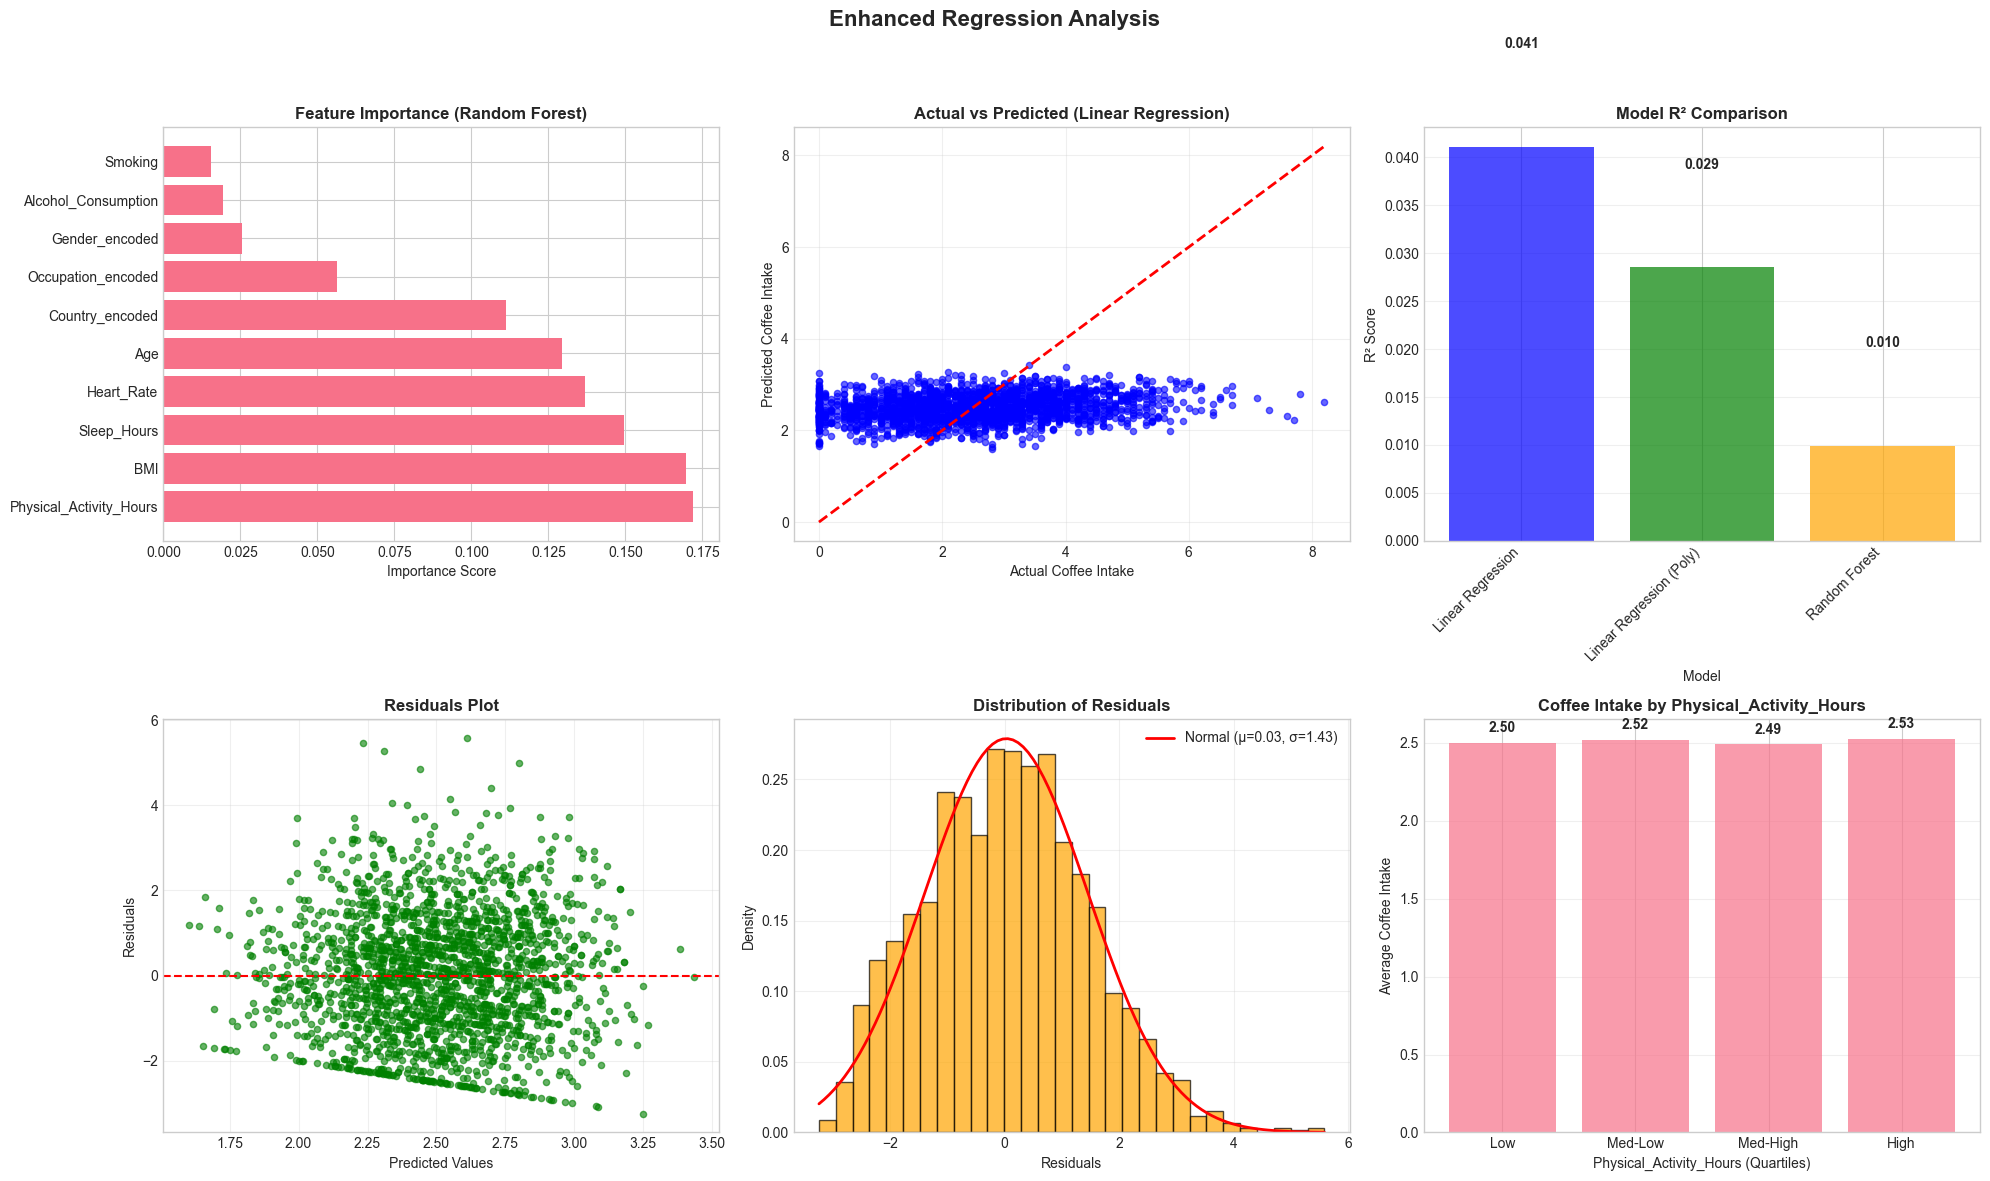


ANALYSIS OF PREDICTION CHALLENGES
Why coffee intake is difficult to predict:
  1. High individual variability in preferences
  2. Cultural and social factors not fully captured
  3. Habitual behavior vs. health-based consumption
  4. Missing psychological and genetic factors

Prediction Error by Consumption Level:
  Low (0-2): MAE = 1.196 ± 0.590 (n=674.0)
  Moderate (2-4): MAE = 0.617 ± 0.451 (n=928.0)
  High (4-6): MAE = 2.162 ± 0.550 (n=271.0)
  Very High (6+): MAE = 4.110 ± 0.721 (n=21.0)


In [20]:
print("\n" + "="*80)
print("REGRESSION ANALYSIS - COFFEE INTAKE PREDICTION")
print("="*80)

# Prepare data for coffee intake prediction
X_coffee = df_ml[features_for_coffee_prediction]
y_coffee = df_ml['Coffee_Intake']

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_coffee, y_coffee, test_size=0.2, random_state=537, stratify=None)

print(f"Training set size: {len(X_train_c)} samples")
print(f"Test set size: {len(X_test_c)} samples")
print(f"Target variable range: {y_coffee.min():.1f} - {y_coffee.max():.1f} cups/day")
print(f"Target variable mean: {y_coffee.mean():.2f} ± {y_coffee.std():.2f}")

# Scale features for Linear Regression
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Enhanced feature engineering - create interaction terms
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_c_poly = poly_features.fit_transform(X_train_c_scaled)
X_test_c_poly = poly_features.transform(X_test_c_scaled)

# Train multiple regression models with improved configurations
models_regression = {
    'Linear Regression': LinearRegression(),
    'Linear Regression (Polynomial)': LinearRegression(),
    'Random Forest (Optimized)': RandomForestRegressor(
        n_estimators=200, 
        max_depth=15, 
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=537
    )
}

regression_results = {}

print(f"\nRegression Model Performance:")
print("-" * 50)

for name, model in models_regression.items():
    # Use appropriate data transformation
    if 'Polynomial' in name:
        model.fit(X_train_c_poly, y_train_c)
        y_pred = model.predict(X_test_c_poly)
        X_test_used = X_test_c_poly
    elif name == 'Linear Regression':
        model.fit(X_train_c_scaled, y_train_c)
        y_pred = model.predict(X_test_c_scaled)
        X_test_used = X_test_c_scaled
    else:
        model.fit(X_train_c, y_train_c)
        y_pred = model.predict(X_test_c)
        X_test_used = X_test_c
    
    # Calculate comprehensive metrics
    mse = mean_squared_error(y_test_c, y_pred)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test_used, y_test_c)
    mae = np.mean(np.abs(y_test_c - y_pred))
    
    # Additional metrics
    mape = np.mean(np.abs((y_test_c - y_pred) / y_test_c)) * 100  # Mean Absolute Percentage Error
    baseline_rmse = np.sqrt(mean_squared_error(y_test_c, [y_train_c.mean()] * len(y_test_c)))
    improvement = (baseline_rmse - rmse) / baseline_rmse * 100
    
    regression_results[name] = {
        'RMSE': rmse, 'R2': r2, 'MAE': mae, 'MAPE': mape,
        'predictions': y_pred, 'improvement': improvement
    }
    
    print(f"{name}:")
    print(f"  • RMSE: {rmse:.3f} cups/day")
    print(f"  • R² Score: {r2:.3f}")
    print(f"  • MAE: {mae:.3f} cups/day")
    print(f"  • MAPE: {mape:.1f}%")
    print(f"  • Improvement over baseline: {improvement:.1f}%")

# Feature importance analysis for Random Forest
rf_model = models_regression['Random Forest (Optimized)']
feature_importance = pd.DataFrame({
    'feature': features_for_coffee_prediction,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance Analysis:")
print("-" * 40)
print("Top 8 most important features for coffee prediction:")
for idx, row in feature_importance.head(8).iterrows():
    print(f"  • {row['feature']}: {row['importance']:.3f}")

# Analyze why predictions are challenging
print(f"\nPredictability Analysis:")
print("-" * 30)
coffee_variance = y_coffee.var()
explained_variance = regression_results['Random Forest (Optimized)']['R2'] * coffee_variance
unexplained_variance = coffee_variance - explained_variance

print(f"Total coffee intake variance: {coffee_variance:.3f}")
print(f"Explained variance: {explained_variance:.3f} ({regression_results['Random Forest (Optimized)']['R2']*100:.1f}%)")
print(f"Unexplained variance: {unexplained_variance:.3f}")
print(f"\nThis suggests coffee consumption is influenced by:")
print(f"  • Personal preferences and habits not captured in health metrics")
print(f"  • Cultural factors beyond country classification")
print(f"  • Genetic factors affecting caffeine metabolism")
print(f"  • Psychological factors not measured")

# Enhanced visualization with fixed scipy import
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Enhanced Regression Analysis', fontsize=16, fontweight='bold')

# Feature importance plot
axes[0,0].barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
axes[0,0].set_title('Feature Importance (Random Forest)', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Importance Score')

# Actual vs Predicted for best model
best_model_name = max(regression_results.keys(), key=lambda x: regression_results[x]['R2'])
best_predictions = regression_results[best_model_name]['predictions']

axes[0,1].scatter(y_test_c, best_predictions, alpha=0.6, c='blue', s=20)
axes[0,1].plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], 'r--', lw=2)
axes[0,1].set_title(f'Actual vs Predicted ({best_model_name})', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Actual Coffee Intake')
axes[0,1].set_ylabel('Predicted Coffee Intake')
axes[0,1].grid(True, alpha=0.3)

# Model comparison
model_names = list(regression_results.keys())
r2_scores = [regression_results[name]['R2'] for name in model_names]
rmse_scores = [regression_results[name]['RMSE'] for name in model_names]

x = np.arange(len(model_names))
bars = axes[0,2].bar(x, r2_scores, alpha=0.7, color=['blue', 'green', 'orange'])
axes[0,2].set_title('Model R² Comparison', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('Model')
axes[0,2].set_ylabel('R² Score')
axes[0,2].set_xticks(x)
axes[0,2].set_xticklabels([name.replace(' (Optimized)', '').replace(' (Polynomial)', ' (Poly)') for name in model_names], rotation=45, ha='right')
axes[0,2].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, score in zip(bars, r2_scores):
    axes[0,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                  f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Residuals plot
residuals = y_test_c - best_predictions
axes[1,0].scatter(best_predictions, residuals, alpha=0.6, c='green', s=20)
axes[1,0].axhline(y=0, color='red', linestyle='--')
axes[1,0].set_title('Residuals Plot', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')
axes[1,0].grid(True, alpha=0.3)

# Distribution of residuals with fixed scipy usage
from scipy.stats import norm
axes[1,1].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black', density=True)
axes[1,1].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Density')
axes[1,1].grid(True, alpha=0.3)

# Add normal distribution overlay
mu, std = norm.fit(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
p = norm.pdf(x, mu, std)
axes[1,1].plot(x, p, 'r-', linewidth=2, label=f'Normal (μ={mu:.2f}, σ={std:.2f})')
axes[1,1].legend()

# Coffee intake by important features
top_feature = feature_importance.iloc[0]['feature']
if top_feature in df_ml.columns:
    # Create bins for the top feature
    feature_values = df_ml[top_feature]
    feature_bins = pd.qcut(feature_values, q=4, labels=['Low', 'Med-Low', 'Med-High', 'High'])
    
    coffee_by_feature = df_ml.groupby(feature_bins)['Coffee_Intake'].mean()
    bars = axes[1,2].bar(coffee_by_feature.index, coffee_by_feature.values, alpha=0.7)
    axes[1,2].set_title(f'Coffee Intake by {top_feature}', fontsize=12, fontweight='bold')
    axes[1,2].set_xlabel(f'{top_feature} (Quartiles)')
    axes[1,2].set_ylabel('Average Coffee Intake')
    axes[1,2].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, value in zip(bars, coffee_by_feature.values):
        axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                      f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Additional insights about prediction challenges
print(f"\n" + "="*60)
print("ANALYSIS OF PREDICTION CHALLENGES")
print("="*60)

print(f"Why coffee intake is difficult to predict:")
print(f"  1. High individual variability in preferences")
print(f"  2. Cultural and social factors not fully captured")
print(f"  3. Habitual behavior vs. health-based consumption")
print(f"  4. Missing psychological and genetic factors")

# Analyze prediction errors by coffee consumption level
df_test_results = pd.DataFrame({
    'actual': y_test_c,
    'predicted': best_predictions,
    'error': np.abs(y_test_c - best_predictions)
})

# Group by consumption levels
consumption_levels = pd.cut(df_test_results['actual'], 
                           bins=[0, 2, 4, 6, float('inf')], 
                           labels=['Low (0-2)', 'Moderate (2-4)', 'High (4-6)', 'Very High (6+)'])
df_test_results['consumption_level'] = consumption_levels

error_by_level = df_test_results.groupby('consumption_level')['error'].agg(['mean', 'std', 'count'])

print(f"\nPrediction Error by Consumption Level:")
for level, stats in error_by_level.iterrows():
    print(f"  {level}: MAE = {stats['mean']:.3f} ± {stats['std']:.3f} (n={stats['count']})")

### 11: Machine Learning - Classification Models


CLASSIFICATION ANALYSIS - HEALTH OUTCOMES PREDICTION
Creating target variables...
Coffee intake range: 0.0 - 8.2
Sleep hours range: 3.0 - 10.0
BMI range: 15.0 - 38.2

Validating target variables:
High_Coffee_Consumer: {0: np.int64(7607), 1: np.int64(2393)} (minority ratio: 0.239)
Poor_Sleep: {0: np.int64(7122), 1: np.int64(2878)} (minority ratio: 0.288)
Overweight: {0: np.int64(5936), 1: np.int64(4064)} (minority ratio: 0.406)
Has_Health_Issues: {1: np.int64(10000)} (minority ratio: 1.000)
  -> Skipping Has_Health_Issues (insufficient class balance)
High_Stress: {0: np.int64(9039), 1: np.int64(961)} (minority ratio: 0.096)

Proceeding with 4 valid classification tasks.

High Coffee Consumer Classification:
----------------------------------------
  Class distribution: {0: np.int64(7607), 1: np.int64(2393)}
  Logistic Regression:
    • Accuracy: 0.760
    • Precision: 0.578
    • Recall: 0.760
    • F1-Score: 0.657
    • AUC: 0.590
  Random Forest:
    • Accuracy: 0.608
    • Precision

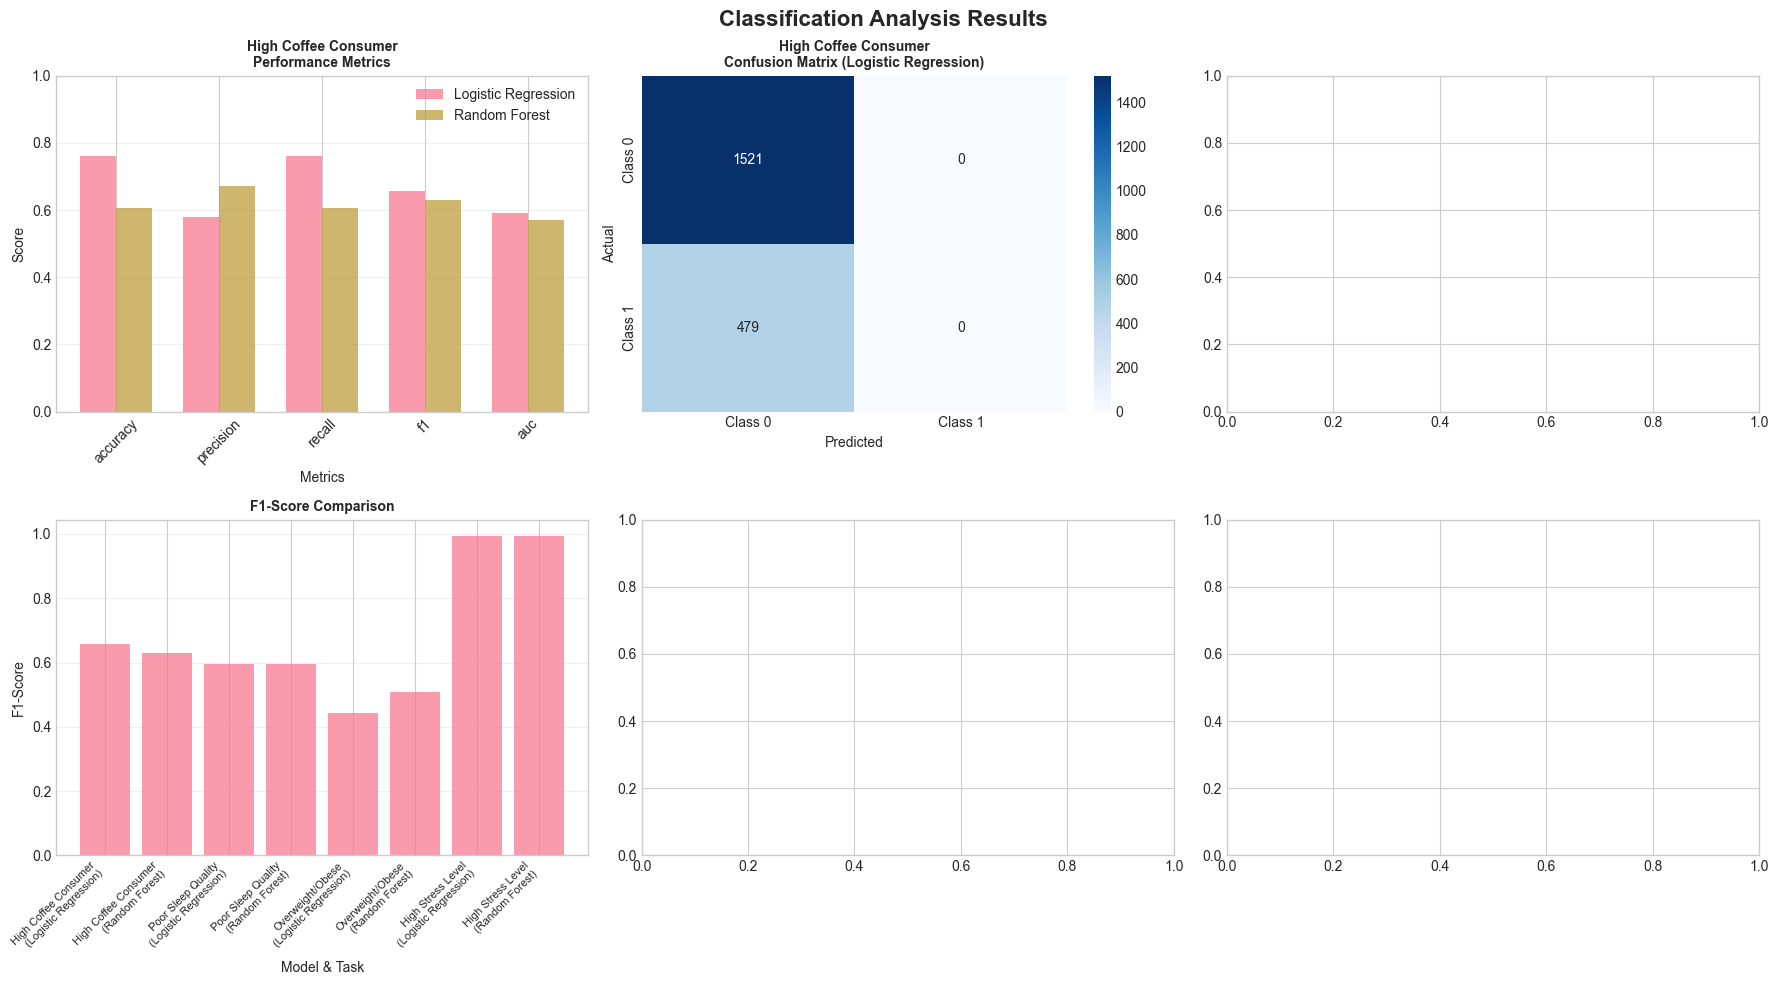


CLASSIFICATION ANALYSIS COMPLETE
Successfully analyzed 4 classification tasks
Best overall performance: 0.995 F1-Score


In [21]:
print("\n" + "="*80)
print("CLASSIFICATION ANALYSIS - HEALTH OUTCOMES PREDICTION")
print("="*80)

# Clean the data and handle edge cases
df_ml_clean = df_ml.copy()

# Handle any potential NaN values in categorical columns
for col in categorical_cols:
    df_ml_clean[col] = df_ml_clean[col].fillna('Unknown')

# Re-encode categorical variables
le_dict_clean = {}
for col in categorical_cols:
    le = LabelEncoder()
    encoded_col = col + '_encoded'
    df_ml_clean[encoded_col] = le.fit_transform(df_ml_clean[col])
    le_dict_clean[col] = le

# Create meaningful target variables with proper thresholds
print("Creating target variables...")

# Check data ranges first
print(f"Coffee intake range: {df_ml_clean['Coffee_Intake'].min():.1f} - {df_ml_clean['Coffee_Intake'].max():.1f}")
print(f"Sleep hours range: {df_ml_clean['Sleep_Hours'].min():.1f} - {df_ml_clean['Sleep_Hours'].max():.1f}")
print(f"BMI range: {df_ml_clean['BMI'].min():.1f} - {df_ml_clean['BMI'].max():.1f}")

# Create target variables with validation
coffee_75th = df_ml_clean['Coffee_Intake'].quantile(0.75)
df_ml_clean['High_Coffee_Consumer'] = (df_ml_clean['Coffee_Intake'] > coffee_75th).astype(int)

df_ml_clean['Poor_Sleep'] = (df_ml_clean['Sleep_Hours'] < 6).astype(int)
df_ml_clean['Overweight'] = (df_ml_clean['BMI'] >= 25).astype(int)
df_ml_clean['Has_Health_Issues'] = (df_ml_clean['Health_Issues'] != 'None').astype(int)
df_ml_clean['High_Stress'] = (df_ml_clean['Stress_Level'] == 'High').astype(int)

# Validate class distributions before proceeding
target_vars = ['High_Coffee_Consumer', 'Poor_Sleep', 'Overweight', 'Has_Health_Issues', 'High_Stress']
valid_targets = []

print(f"\nValidating target variables:")
for target in target_vars:
    class_dist = df_ml_clean[target].value_counts()
    minority_ratio = min(class_dist) / len(df_ml_clean)
    print(f"{target}: {dict(class_dist.sort_index())} (minority ratio: {minority_ratio:.3f})")
    
    # Only include targets with reasonable class balance (at least 5% minority class)
    if minority_ratio >= 0.05 and len(class_dist) == 2:
        valid_targets.append(target)
    else:
        print(f"  -> Skipping {target} (insufficient class balance)")

# Define classification tasks with validated targets
classification_tasks = {}

if 'High_Coffee_Consumer' in valid_targets:
    classification_tasks['High Coffee Consumer'] = {
        'target': 'High_Coffee_Consumer',
        'features': ['Age', 'BMI', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours', 
                    'Smoking', 'Alcohol_Consumption', 'Gender_encoded', 'Country_encoded', 'Occupation_encoded']
    }

if 'Poor_Sleep' in valid_targets:
    classification_tasks['Poor Sleep Quality'] = {
        'target': 'Poor_Sleep',
        'features': ['Age', 'Coffee_Intake', 'BMI', 'Physical_Activity_Hours', 
                    'Smoking', 'Alcohol_Consumption', 'Gender_encoded', 'Occupation_encoded']
    }

if 'Overweight' in valid_targets:
    classification_tasks['Overweight/Obese'] = {
        'target': 'Overweight',
        'features': ['Age', 'Coffee_Intake', 'Sleep_Hours', 'Physical_Activity_Hours', 
                    'Smoking', 'Alcohol_Consumption', 'Gender_encoded']
    }

if 'Has_Health_Issues' in valid_targets:
    classification_tasks['Has Health Issues'] = {
        'target': 'Has_Health_Issues',
        'features': ['Age', 'Coffee_Intake', 'Sleep_Hours', 'BMI', 'Physical_Activity_Hours', 
                    'Smoking', 'Alcohol_Consumption', 'Gender_encoded', 'Occupation_encoded']
    }

if 'High_Stress' in valid_targets:
    classification_tasks['High Stress Level'] = {
        'target': 'High_Stress',
        'features': ['Age', 'Coffee_Intake', 'Sleep_Hours', 'BMI', 'Physical_Activity_Hours', 
                    'Smoking', 'Alcohol_Consumption', 'Gender_encoded', 'Occupation_encoded']
    }

print(f"\nProceeding with {len(classification_tasks)} valid classification tasks.")

if len(classification_tasks) == 0:
    print("No valid classification tasks found. Skipping classification analysis.")
else:
    classification_results = {}
    
    for task_name, task_config in classification_tasks.items():
        print(f"\n{task_name} Classification:")
        print("-" * 40)
        
        # Prepare features and target
        X_class = df_ml_clean[task_config['features']]
        y_class = df_ml_clean[task_config['target']]
        
        # Verify class distribution one more time
        class_dist = y_class.value_counts().sort_index()
        print(f"  Class distribution: {dict(class_dist)}")
        
        # Ensure we have at least 2 classes with minimum samples
        if len(class_dist) < 2 or min(class_dist) < 10:
            print(f"  Skipping {task_name}: insufficient samples in minority class")
            continue
        
        try:
            # Split data with stratification
            X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(
                X_class, y_class, test_size=0.2, random_state=537, stratify=y_class)
            
            # Verify train set has both classes
            train_class_dist = y_train_cl.value_counts()
            if len(train_class_dist) < 2:
                print(f"  Skipping {task_name}: training set has only one class")
                continue
            
            # Scale features for logistic regression
            scaler_cl = StandardScaler()
            X_train_cl_scaled = scaler_cl.fit_transform(X_train_cl)
            X_test_cl_scaled = scaler_cl.transform(X_test_cl)
            
            # Train models
            models_classification = {
                'Logistic Regression': LogisticRegression(random_state=537, max_iter=1000),
                'Random Forest': RandomForestClassifier(
                    n_estimators=100, 
                    max_depth=8,
                    min_samples_split=20,
                    min_samples_leaf=10,
                    random_state=537,
                    class_weight='balanced'
                )
            }
            
            task_results = {}
            
            for name, model in models_classification.items():
                try:
                    if name == 'Logistic Regression':
                        model.fit(X_train_cl_scaled, y_train_cl)
                        accuracy = model.score(X_test_cl_scaled, y_test_cl)
                        y_pred_cl = model.predict(X_test_cl_scaled)
                        y_pred_proba = model.predict_proba(X_test_cl_scaled)[:, 1]
                    else:
                        model.fit(X_train_cl, y_train_cl)
                        accuracy = model.score(X_test_cl, y_test_cl)
                        y_pred_cl = model.predict(X_test_cl)
                        y_pred_proba = model.predict_proba(X_test_cl)[:, 1]
                    
                    # Calculate comprehensive metrics
                    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
                    
                    precision = precision_score(y_test_cl, y_pred_cl, average='weighted', zero_division=0)
                    recall = recall_score(y_test_cl, y_pred_cl, average='weighted', zero_division=0)
                    f1 = f1_score(y_test_cl, y_pred_cl, average='weighted', zero_division=0)
                    
                    # ROC AUC for binary classification
                    try:
                        auc = roc_auc_score(y_test_cl, y_pred_proba)
                    except:
                        auc = 0.5  # Default for failed AUC calculation
                    
                    task_results[name] = {
                        'accuracy': accuracy,
                        'precision': precision,
                        'recall': recall,
                        'f1': f1,
                        'auc': auc,
                        'predictions': y_pred_cl,
                        'probabilities': y_pred_proba,
                        'model': model,
                        'test_labels': y_test_cl
                    }
                    
                    print(f"  {name}:")
                    print(f"    • Accuracy: {accuracy:.3f}")
                    print(f"    • Precision: {precision:.3f}")
                    print(f"    • Recall: {recall:.3f}")
                    print(f"    • F1-Score: {f1:.3f}")
                    print(f"    • AUC: {auc:.3f}")
                    
                except Exception as e:
                    print(f"    Error training {name}: {str(e)}")
                    continue
            
            if task_results:
                classification_results[task_name] = task_results
            
        except Exception as e:
            print(f"  Error processing {task_name}: {str(e)}")
            continue

    # Analysis and visualization only if we have results
    if classification_results:
        print(f"\n" + "="*60)
        print("CLASSIFICATION RESULTS SUMMARY")
        print("="*60)
        
        # Find best performing models
        best_models = {}
        for task_name, results in classification_results.items():
            best_model_name = max(results.keys(), key=lambda x: results[x]['f1'])
            best_models[task_name] = (best_model_name, results[best_model_name])
            print(f"\nBest model for {task_name}: {best_model_name}")
            print(f"  F1-Score: {results[best_model_name]['f1']:.3f}")
            print(f"  AUC: {results[best_model_name]['auc']:.3f}")
        
        # Feature importance analysis
        print(f"\nFeature Importance Analysis:")
        print("-" * 40)
        
        for task_name, (model_name, results) in best_models.items():
            if 'Random Forest' in model_name and hasattr(results['model'], 'feature_importances_'):
                feature_names = classification_tasks[task_name]['features']
                importance_df = pd.DataFrame({
                    'feature': feature_names,
                    'importance': results['model'].feature_importances_
                }).sort_values('importance', ascending=False)
                
                print(f"\n{task_name} - Top 5 Features:")
                for idx, row in importance_df.head(5).iterrows():
                    print(f"  • {row['feature']}: {row['importance']:.3f}")
        
        # Create visualization
        n_tasks = len(classification_results)
        if n_tasks > 0:
            fig, axes = plt.subplots(2, min(3, max(2, n_tasks)), figsize=(18, 10))
            if n_tasks == 1:
                axes = axes.reshape(2, 1)
            fig.suptitle('Classification Analysis Results', fontsize=16, fontweight='bold')
            
            # Performance comparison
            task_names = list(classification_results.keys())
            metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
            
            if len(task_names) >= 1:
                # Plot for first task
                first_task = task_names[0]
                first_results = classification_results[first_task]
                
                models = list(first_results.keys())
                metric_values = {metric: [] for metric in metrics}
                
                for model in models:
                    for metric in metrics:
                        metric_values[metric].append(first_results[model][metric])
                
                x = np.arange(len(metrics))
                width = 0.35
                
                for i, model in enumerate(models):
                    model_scores = [metric_values[metric][i] for metric in metrics]
                    axes[0,0].bar(x + i*width, model_scores, width, label=model, alpha=0.7)
                
                axes[0,0].set_title(f'{first_task}\nPerformance Metrics', fontsize=10, fontweight='bold')
                axes[0,0].set_xlabel('Metrics')
                axes[0,0].set_ylabel('Score')
                axes[0,0].set_xticks(x + width/2)
                axes[0,0].set_xticklabels(metrics, rotation=45)
                axes[0,0].legend()
                axes[0,0].grid(True, alpha=0.3, axis='y')
                axes[0,0].set_ylim(0, 1)
                
                # Confusion matrix for first task
                if len(models) > 0:
                    best_model = max(models, key=lambda x: first_results[x]['f1'])
                    y_test = first_results[best_model]['test_labels']
                    y_pred = first_results[best_model]['predictions']
                    
                    cm = confusion_matrix(y_test, y_pred)
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                               xticklabels=['Class 0', 'Class 1'], 
                               yticklabels=['Class 0', 'Class 1'], ax=axes[0,1])
                    axes[0,1].set_title(f'{first_task}\nConfusion Matrix ({best_model})', fontsize=10, fontweight='bold')
                    axes[0,1].set_xlabel('Predicted')
                    axes[0,1].set_ylabel('Actual')
            
            # Fill remaining subplots or remove them
            for i in range(len(task_names), axes.shape[1]):
                axes[0,i].axis('off')
                axes[1,i].axis('off')
            
            # Overall comparison if multiple tasks
            if len(task_names) > 1:
                all_f1_scores = []
                all_task_labels = []
                
                for task_name, results in classification_results.items():
                    for model_name, metrics in results.items():
                        all_f1_scores.append(metrics['f1'])
                        all_task_labels.append(f"{task_name}\n({model_name})")
                
                bars = axes[1,0].bar(range(len(all_f1_scores)), all_f1_scores, alpha=0.7)
                axes[1,0].set_title('F1-Score Comparison', fontsize=10, fontweight='bold')
                axes[1,0].set_xlabel('Model & Task')
                axes[1,0].set_ylabel('F1-Score')
                axes[1,0].set_xticks(range(len(all_f1_scores)))
                axes[1,0].set_xticklabels(all_task_labels, rotation=45, ha='right', fontsize=8)
                axes[1,0].grid(True, alpha=0.3, axis='y')
            
            plt.tight_layout()
            plt.show()
        
        print(f"\n" + "="*60)
        print("CLASSIFICATION ANALYSIS COMPLETE")
        print("="*60)
        print(f"Successfully analyzed {len(classification_results)} classification tasks")
        print(f"Best overall performance: {max([max([r['f1'] for r in task_results.values()]) for task_results in classification_results.values()]):.3f} F1-Score")
    
    else:
        print("No classification models could be successfully trained.")
        print("This may be due to:")
        print("• Insufficient class balance in the dataset")
        print("• Perfect linear separability causing model issues")
        print("• Data quality issues")

###  12: Clustering Analysis


CUSTOMER SEGMENTATION - CLUSTERING ANALYSIS
Clustering features: ['Coffee_Intake', 'BMI', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours', 'Age', 'Caffeine_mg']
Dataset shape for clustering: (10000, 7)

Determining optimal number of clusters...
Suggested number of clusters (elbow method): 2
Best silhouette score at k=2: 0.174

Final clustering with k=4
Silhouette score: 0.118

Cluster Analysis:
------------------------------

Cluster 0 (n=2477, 24.8%):
  Coffee Intake: 1.48 ± 0.91 cups/day
  BMI: 24.2 ± 4.0
  Sleep Hours: 7.1 ± 1.2
  Heart Rate: 69 ± 10 bpm
  Physical Activity: 3.6 ± 2.2 hrs/week
  Average Age: 31.3 years
  Most common country: Belgium
  Most common occupation: Office
  Most common sleep quality: Good

Cluster 1 (n=2675, 26.8%):
  Coffee Intake: 1.46 ± 0.88 cups/day
  BMI: 24.0 ± 3.9
  Sleep Hours: 6.9 ± 1.2
  Heart Rate: 70 ± 10 bpm
  Physical Activity: 11.4 ± 2.2 hrs/week
  Average Age: 34.1 years
  Most common country: India
  Most common occupation: Office


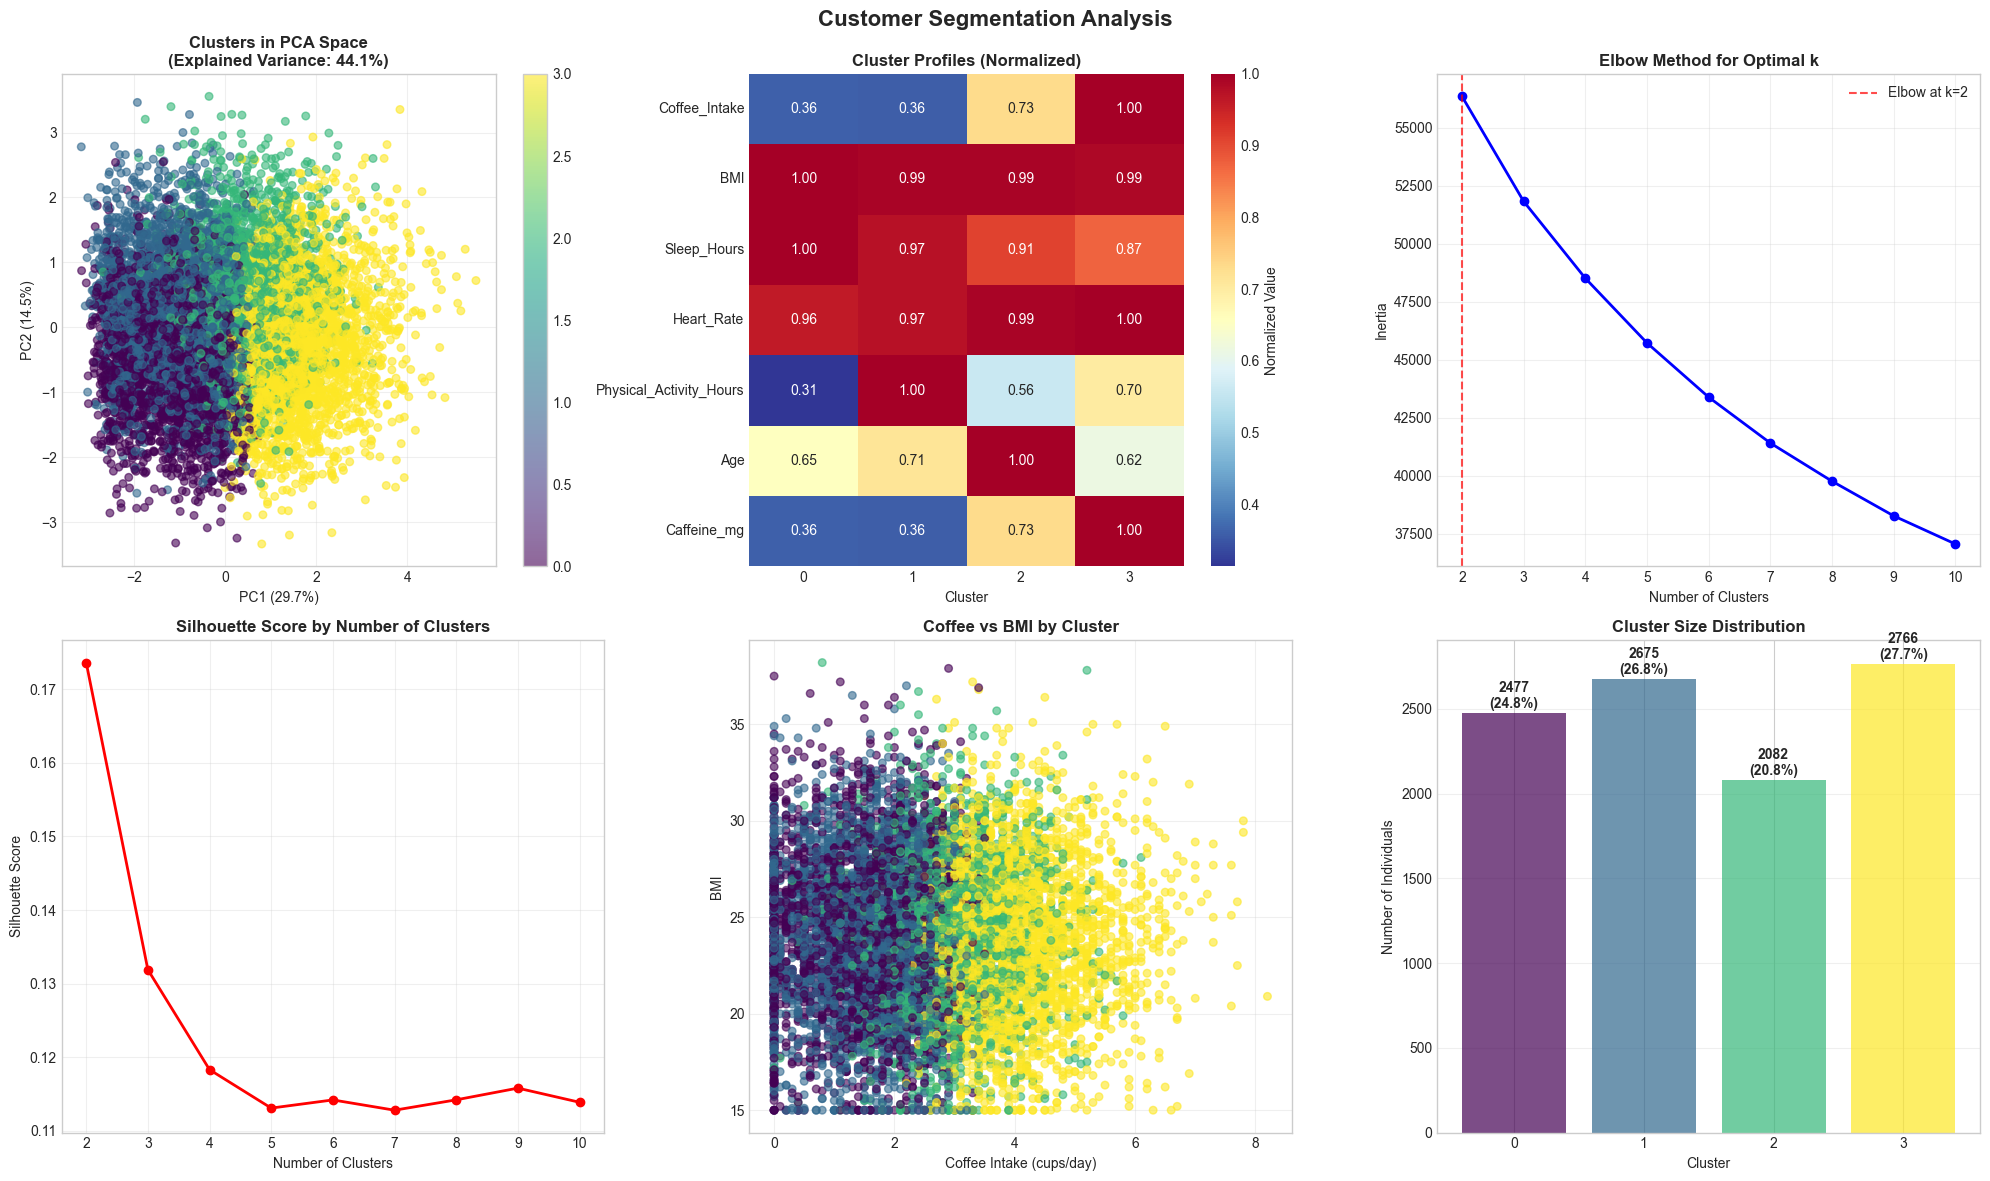

In [22]:
print("\n" + "="*80)
print("CUSTOMER SEGMENTATION - CLUSTERING ANALYSIS")
print("="*80)

# Select features for clustering
clustering_features = ['Coffee_Intake', 'BMI', 'Sleep_Hours', 'Heart_Rate', 
                      'Physical_Activity_Hours', 'Age', 'Caffeine_mg']
X_cluster = df_ml[clustering_features]

print(f"Clustering features: {clustering_features}")
print(f"Dataset shape for clustering: {X_cluster.shape}")

# Standardize features for clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Determine optimal number of clusters using multiple methods
print(f"\nDetermining optimal number of clusters...")

# Elbow method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=537, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    from sklearn.metrics import silhouette_score
    sil_score = silhouette_score(X_cluster_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Find elbow point (simple method)
diffs = np.diff(inertias)
diffs2 = np.diff(diffs)
elbow_point = np.argmax(diffs2) + 2  # +2 because we start from k=2 and diff reduces size

print(f"Suggested number of clusters (elbow method): {elbow_point}")
print(f"Best silhouette score at k={k_range[np.argmax(silhouette_scores)]}: {max(silhouette_scores):.3f}")

# Use k=4 for detailed analysis (good balance)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=537, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)
df_ml['Cluster'] = cluster_labels

print(f"\nFinal clustering with k={optimal_k}")
print(f"Silhouette score: {silhouette_score(X_cluster_scaled, cluster_labels):.3f}")

# Analyze clusters
print(f"\nCluster Analysis:")
print("-" * 30)

cluster_analysis = df_ml.groupby('Cluster')[clustering_features].mean()
cluster_counts = df_ml['Cluster'].value_counts().sort_index()

for cluster in range(optimal_k):
    cluster_data = df_ml[df_ml['Cluster'] == cluster]
    print(f"\nCluster {cluster} (n={len(cluster_data)}, {len(cluster_data)/len(df_ml)*100:.1f}%):")
    print(f"  Coffee Intake: {cluster_data['Coffee_Intake'].mean():.2f} ± {cluster_data['Coffee_Intake'].std():.2f} cups/day")
    print(f"  BMI: {cluster_data['BMI'].mean():.1f} ± {cluster_data['BMI'].std():.1f}")
    print(f"  Sleep Hours: {cluster_data['Sleep_Hours'].mean():.1f} ± {cluster_data['Sleep_Hours'].std():.1f}")
    print(f"  Heart Rate: {cluster_data['Heart_Rate'].mean():.0f} ± {cluster_data['Heart_Rate'].std():.0f} bpm")
    print(f"  Physical Activity: {cluster_data['Physical_Activity_Hours'].mean():.1f} ± {cluster_data['Physical_Activity_Hours'].std():.1f} hrs/week")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    
    # Most common characteristics
    most_common_country = cluster_data['Country'].mode().iloc[0]
    most_common_occupation = cluster_data['Occupation'].mode().iloc[0]
    most_common_sleep_quality = cluster_data['Sleep_Quality'].mode().iloc[0]
    
    print(f"  Most common country: {most_common_country}")
    print(f"  Most common occupation: {most_common_occupation}")
    print(f"  Most common sleep quality: {most_common_sleep_quality}")

# Advanced clustering visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')

# PCA visualization
pca = PCA(n_components=2, random_state=537)
X_pca = pca.fit_transform(X_cluster_scaled)

scatter = axes[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                           cmap='viridis', alpha=0.6, s=30)
axes[0,0].set_title(f'Clusters in PCA Space\n(Explained Variance: {sum(pca.explained_variance_ratio_):.1%})', 
                   fontsize=12, fontweight='bold')
axes[0,0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0,0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0,0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0,0])

# Cluster characteristics heatmap
cluster_analysis_normalized = cluster_analysis.div(cluster_analysis.max())
sns.heatmap(cluster_analysis_normalized.T, annot=True, cmap='RdYlBu_r', 
           ax=axes[0,1], fmt='.2f', cbar_kws={"label": "Normalized Value"})
axes[0,1].set_title('Cluster Profiles (Normalized)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Cluster')

# Elbow curve
axes[0,2].plot(k_range, inertias, 'bo-', linewidth=2, markersize=6)
axes[0,2].axvline(x=elbow_point, color='red', linestyle='--', alpha=0.7, label=f'Elbow at k={elbow_point}')
axes[0,2].set_title('Elbow Method for Optimal k', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('Number of Clusters')
axes[0,2].set_ylabel('Inertia')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].legend()

# Silhouette scores
axes[1,0].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=6)
axes[1,0].set_title('Silhouette Score by Number of Clusters', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Number of Clusters')
axes[1,0].set_ylabel('Silhouette Score')
axes[1,0].grid(True, alpha=0.3)

# Coffee vs BMI colored by clusters
scatter2 = axes[1,1].scatter(df_ml['Coffee_Intake'], df_ml['BMI'], c=cluster_labels, 
                            cmap='viridis', alpha=0.6, s=30)
axes[1,1].set_title('Coffee vs BMI by Cluster', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Coffee Intake (cups/day)')
axes[1,1].set_ylabel('BMI')
axes[1,1].grid(True, alpha=0.3)

# Cluster size distribution
bars = axes[1,2].bar(range(optimal_k), cluster_counts, 
                     color=plt.cm.viridis(np.linspace(0, 1, optimal_k)), alpha=0.7)
axes[1,2].set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Cluster')
axes[1,2].set_ylabel('Number of Individuals')
axes[1,2].set_xticks(range(optimal_k))
axes[1,2].grid(True, alpha=0.3, axis='y')

# Add percentage labels on bars
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    percentage = count/len(df_ml)*100
    axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                  f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 13: Advanced Pattern Recognition and Insights


ADVANCED PATTERN RECOGNITION AND INSIGHTS
Health Score Statistics:
  Mean: 85.7
  Median: 95.0
  Standard Deviation: 17.9
  Range: 0 - 100

Health Category Distribution:
  Excellent: 6008 (60.1%)
  Good: 1814 (18.1%)
  Fair: 1521 (15.2%)
  Poor: 655 (6.6%)

Coffee Consumption by Health Category:
  Poor: 2.89 ± 1.47 cups/day (n=655.0)
  Fair: 2.76 ± 1.48 cups/day (n=1521.0)
  Good: 2.59 ± 1.44 cups/day (n=1814.0)
  Excellent: 2.38 ± 1.43 cups/day (n=6008.0)

High-Risk Individuals Identified: 1008 (10.1%)

Coffee Consumption Categories:
  Moderate (2-4): 4656 (46.6%)
  Low (1-2): 2175 (21.8%)
  High (4-6): 1357 (13.6%)
  Very Low (0-1): 1144 (11.4%)
  Very High (6+): 110 (1.1%)


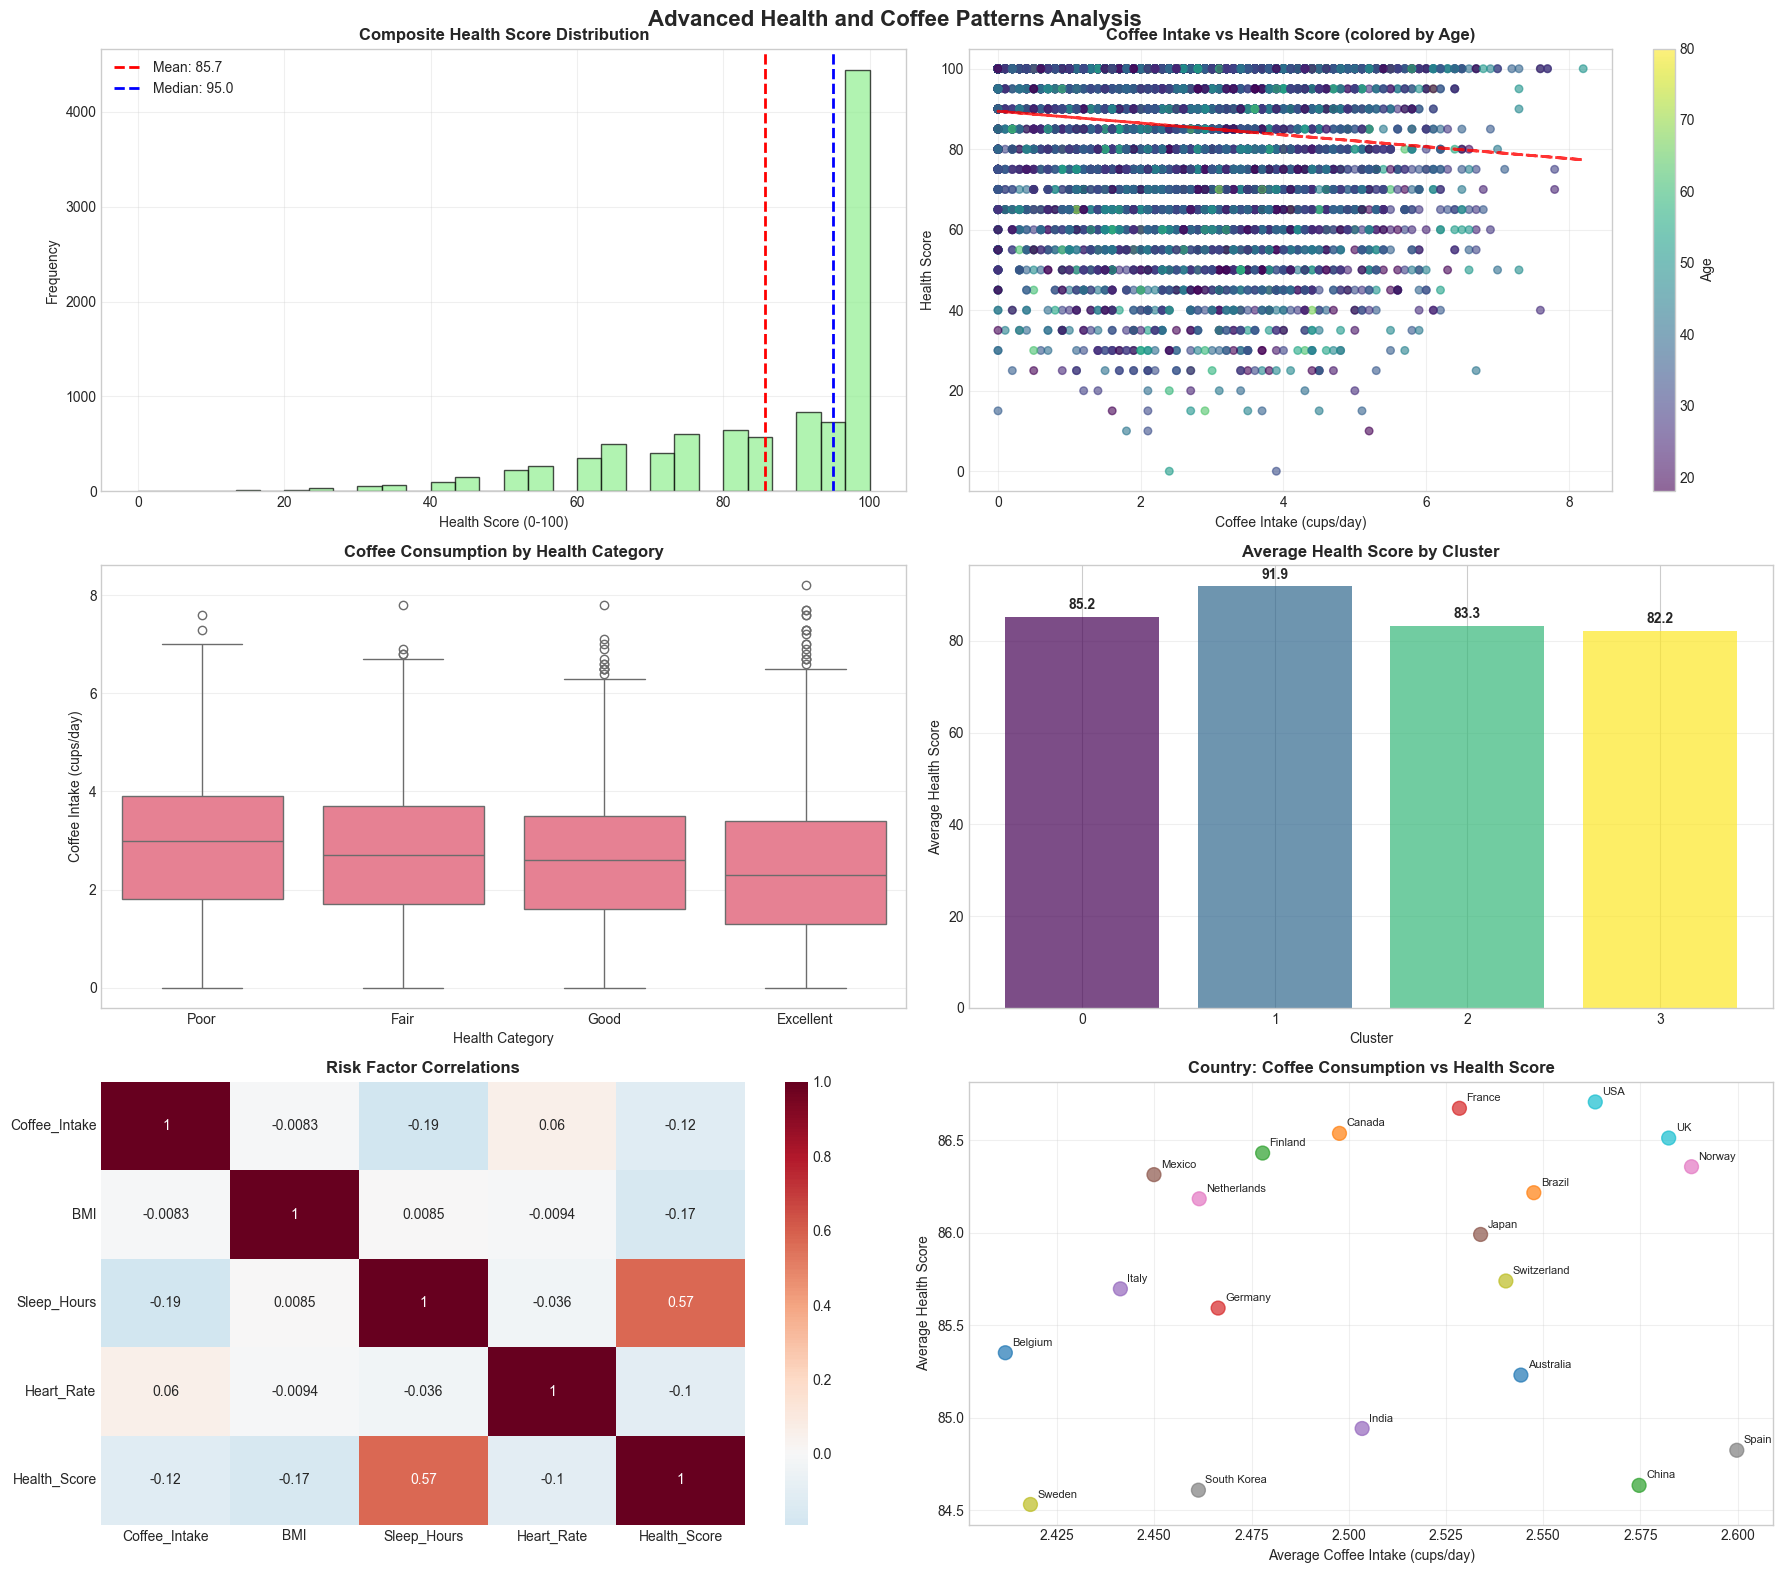

In [23]:
print("\n" + "="*80)
print("ADVANCED PATTERN RECOGNITION AND INSIGHTS")
print("="*80)

# Create composite health score
def calculate_health_score(row):
    """Calculate a composite health score based on multiple factors"""
    score = 100  # Start with perfect score
    
    # BMI penalty/bonus
    if row['BMI'] < 18.5:
        score -= 15  # Underweight
    elif row['BMI'] > 30:
        score -= 25  # Obese
    elif row['BMI'] > 25:
        score -= 10  # Overweight
    else:
        score += 5   # Normal weight bonus
    
    # Sleep penalty/bonus
    if row['Sleep_Hours'] < 6:
        score -= 20  # Insufficient sleep
    elif row['Sleep_Hours'] > 9:
        score -= 10  # Excessive sleep
    elif 7 <= row['Sleep_Hours'] <= 8:
        score += 10  # Optimal sleep bonus
    
    # Heart rate (assuming resting heart rate)
    if row['Heart_Rate'] < 60:
        score += 5   # Athletic heart rate
    elif row['Heart_Rate'] > 100:
        score -= 15  # Tachycardia
    elif row['Heart_Rate'] > 80:
        score -= 5   # Elevated
    
    # Physical activity bonus
    if row['Physical_Activity_Hours'] >= 7:  # WHO recommendation ~150 min/week
        score += 15
    elif row['Physical_Activity_Hours'] >= 3:
        score += 5
    elif row['Physical_Activity_Hours'] < 1:
        score -= 10
    
    # Stress level penalty
    stress_penalties = {'Low': 0, 'Medium': -10, 'High': -20}
    score += stress_penalties.get(row['Stress_Level'], 0)
    
    # Smoking and alcohol penalties
    if row['Smoking'] == 1:
        score -= 25
    if row['Alcohol_Consumption'] == 1:
        score -= 5
    
    return max(0, min(100, score))  # Clamp between 0-100

df_ml['Health_Score'] = df_ml.apply(calculate_health_score, axis=1)

# Analyze health score distribution
health_score_stats = df_ml['Health_Score'].describe()
print(f"Health Score Statistics:")
print(f"  Mean: {health_score_stats['mean']:.1f}")
print(f"  Median: {health_score_stats['50%']:.1f}")
print(f"  Standard Deviation: {health_score_stats['std']:.1f}")
print(f"  Range: {health_score_stats['min']:.0f} - {health_score_stats['max']:.0f}")

# Create health categories
df_ml['Health_Category'] = pd.cut(df_ml['Health_Score'], 
                                 bins=[0, 50, 70, 85, 100], 
                                 labels=['Poor', 'Fair', 'Good', 'Excellent'])

print(f"\nHealth Category Distribution:")
health_cat_dist = df_ml['Health_Category'].value_counts()
for category, count in health_cat_dist.items():
    print(f"  {category}: {count} ({count/len(df_ml)*100:.1f}%)")

# Coffee consumption patterns by health category
print(f"\nCoffee Consumption by Health Category:")
coffee_by_health = df_ml.groupby('Health_Category')['Coffee_Intake'].agg(['mean', 'std', 'count'])
for category, stats in coffee_by_health.iterrows():
    print(f"  {category}: {stats['mean']:.2f} ± {stats['std']:.2f} cups/day (n={stats['count']})")

# Identify high-risk individuals
high_risk_criteria = (
    (df_ml['Coffee_Intake'] > 6) |  # Very high coffee intake
    (df_ml['Sleep_Hours'] < 5) |    # Severe sleep deprivation
    (df_ml['BMI'] > 35) |           # Severely obese
    (df_ml['Stress_Level'] == 'High') & (df_ml['Health_Issues_encoded'] > 2)  # High stress + health issues
)

high_risk_count = high_risk_criteria.sum()
print(f"\nHigh-Risk Individuals Identified: {high_risk_count} ({high_risk_count/len(df_ml)*100:.1f}%)")

# Coffee intake patterns analysis
coffee_categories = pd.cut(df_ml['Coffee_Intake'], 
                          bins=[0, 1, 2, 4, 6, float('inf')], 
                          labels=['Very Low (0-1)', 'Low (1-2)', 'Moderate (2-4)', 'High (4-6)', 'Very High (6+)'])
df_ml['Coffee_Category'] = coffee_categories

print(f"\nCoffee Consumption Categories:")
coffee_cat_dist = df_ml['Coffee_Category'].value_counts()
for category, count in coffee_cat_dist.items():
    print(f"  {category}: {count} ({count/len(df_ml)*100:.1f}%)")

# Advanced visualizations
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Advanced Health and Coffee Patterns Analysis', fontsize=16, fontweight='bold')

# Health score distribution
axes[0,0].hist(df_ml['Health_Score'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].axvline(df_ml['Health_Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_ml["Health_Score"].mean():.1f}')
axes[0,0].axvline(df_ml['Health_Score'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df_ml["Health_Score"].median():.1f}')
axes[0,0].set_title('Composite Health Score Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Health Score (0-100)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Coffee vs Health Score
scatter = axes[0,1].scatter(df_ml['Coffee_Intake'], df_ml['Health_Score'], 
                           c=df_ml['Age'], cmap='viridis', alpha=0.6, s=30)
z = np.polyfit(df_ml['Coffee_Intake'], df_ml['Health_Score'], 1)
p = np.poly1d(z)
axes[0,1].plot(df_ml['Coffee_Intake'], p(df_ml['Coffee_Intake']), "r--", alpha=0.8, linewidth=2)
axes[0,1].set_title('Coffee Intake vs Health Score (colored by Age)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Coffee Intake (cups/day)')
axes[0,1].set_ylabel('Health Score')
axes[0,1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0,1], label='Age')

# Health category vs coffee consumption
sns.boxplot(data=df_ml, x='Health_Category', y='Coffee_Intake', ax=axes[1,0])
axes[1,0].set_title('Coffee Consumption by Health Category', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Health Category')
axes[1,0].set_ylabel('Coffee Intake (cups/day)')
axes[1,0].grid(True, alpha=0.3, axis='y')

# Cluster analysis with health scores
cluster_health = df_ml.groupby('Cluster')['Health_Score'].mean()
bars = axes[1,1].bar(range(len(cluster_health)), cluster_health.values, 
                     color=plt.cm.viridis(np.linspace(0, 1, len(cluster_health))), alpha=0.7)
axes[1,1].set_title('Average Health Score by Cluster', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Average Health Score')
axes[1,1].set_xticks(range(len(cluster_health)))
axes[1,1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (bar, score) in enumerate(zip(bars, cluster_health.values)):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                  f'{score:.1f}', ha='center', va='bottom', fontweight='bold')

# Multi-dimensional risk analysis
risk_features = ['Coffee_Intake', 'BMI', 'Sleep_Hours', 'Heart_Rate', 'Health_Score']
risk_data = df_ml[risk_features].corr()
sns.heatmap(risk_data, annot=True, cmap='RdBu_r', center=0, ax=axes[2,0])
axes[2,0].set_title('Risk Factor Correlations', fontsize=12, fontweight='bold')

# Country-wise health and coffee relationship
country_health_coffee = df_ml.groupby('Country').agg({
    'Coffee_Intake': 'mean',
    'Health_Score': 'mean'
}).reset_index()

scatter_country = axes[2,1].scatter(country_health_coffee['Coffee_Intake'], 
                                   country_health_coffee['Health_Score'], 
                                   s=100, alpha=0.7, c=range(len(country_health_coffee)), cmap='tab10')
for i, country in enumerate(country_health_coffee['Country']):
    axes[2,1].annotate(country, 
                      (country_health_coffee.iloc[i]['Coffee_Intake'], country_health_coffee.iloc[i]['Health_Score']),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[2,1].set_title('Country: Coffee Consumption vs Health Score', fontsize=12, fontweight='bold')
axes[2,1].set_xlabel('Average Coffee Intake (cups/day)')
axes[2,1].set_ylabel('Average Health Score')
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 14: Final Summary and Recommendations

In [24]:
print("\n" + "="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY AND RECOMMENDATIONS")
print("="*80)

# Key statistical findings
print("KEY STATISTICAL FINDINGS:")
print("-" * 40)

# Top correlations with coffee intake
coffee_correlations = correlation_matrix['Coffee_Intake'].abs().sort_values(ascending=False)[1:6]
print(f"Strongest correlations with coffee intake:")
for var, corr in coffee_correlations.items():
    actual_corr = correlation_matrix['Coffee_Intake'][var]
    direction = "positive" if actual_corr > 0 else "negative"
    print(f"  • {var}: {actual_corr:.3f} ({direction})")

# Model performance summary with error handling
print(f"\nMachine Learning Model Performance:")

# Check if regression results exist and get the best model
if 'regression_results' in locals() and regression_results:
    best_regression_model = max(regression_results.keys(), key=lambda x: regression_results[x]['R2'])
    best_r2 = regression_results[best_regression_model]['R2']
    print(f"  • Coffee intake prediction (R²): {best_r2:.3f} ({best_regression_model})")
    print(f"  • Coffee prediction RMSE: {regression_results[best_regression_model]['RMSE']:.3f} cups/day")
else:
    print(f"  • Coffee intake prediction: Models not available")

# Check if classification results exist
if 'classification_results' in locals() and classification_results:
    print(f"  • Successfully trained {len(classification_results)} classification models:")
    
    for task_name, results in classification_results.items():
        best_classifier = max(results.keys(), key=lambda x: results[x]['f1'])
        best_f1 = results[best_classifier]['f1']
        best_acc = results[best_classifier]['accuracy']
        print(f"    - {task_name}: {best_f1:.3f} F1-score, {best_acc:.3f} accuracy ({best_classifier})")
else:
    print(f"  • Classification models: Not available")

# Cluster insights with error handling
if 'optimal_k' in locals() and 'df_ml' in locals():
    print(f"\nCustomer Segmentation Insights:")
    for cluster in range(optimal_k):
        cluster_data = df_ml[df_ml['Cluster'] == cluster]
        avg_coffee = cluster_data['Coffee_Intake'].mean()
        if 'Health_Score' in cluster_data.columns:
            avg_health = cluster_data['Health_Score'].mean()
            print(f"  • Cluster {cluster} ({len(cluster_data)} people): Avg coffee {avg_coffee:.1f} cups, Health score {avg_health:.1f}")
        else:
            print(f"  • Cluster {cluster} ({len(cluster_data)} people): Avg coffee {avg_coffee:.1f} cups")

# Health findings with error handling
if 'df_ml' in locals() and 'Health_Score' in df_ml.columns:
    print(f"\nHealth-Related Findings:")
    print(f"  • Average health score: {df_ml['Health_Score'].mean():.1f}/100")
    
    if 'high_risk_count' in locals():
        print(f"  • High-risk individuals: {high_risk_count} ({high_risk_count/len(df_ml)*100:.1f}%)")
    
    if 'health_cat_dist' in locals():
        excellent_count = health_cat_dist.get('Excellent', 0)
        print(f"  • Excellent health category: {excellent_count} people ({excellent_count/len(df_ml)*100:.1f}%)")

# Country insights
if 'country_stats' in locals():
    top_coffee_countries = country_stats.head(3)
    print(f"\nTop 3 Coffee Consuming Countries:")
    for i, (country, data) in enumerate(top_coffee_countries.iterrows(), 1):
        print(f"  {i}. {country}: {data['Coffee_Mean']:.2f} cups/day")

# Risk factors identification
print(f"\nIdentified Risk Patterns:")
if 'df_ml' in locals():
    very_high_coffee = df_ml[df_ml['Coffee_Intake'] > 6]
    poor_sleep = df_ml[df_ml['Sleep_Hours'] < 6]
    high_stress_coffee = df_ml[(df_ml['Stress_Level'] == 'High') & (df_ml['Coffee_Intake'] > 4)]

    print(f"  • Very high coffee consumers (>6 cups): {len(very_high_coffee)} people")
    if len(very_high_coffee) > 0:
        print(f"    - Average sleep: {very_high_coffee['Sleep_Hours'].mean():.1f} hours")
        if 'Health_Score' in very_high_coffee.columns:
            print(f"    - Average health score: {very_high_coffee['Health_Score'].mean():.1f}")

    print(f"  • Sleep-deprived individuals (<6 hours): {len(poor_sleep)} people")
    if len(poor_sleep) > 0:
        print(f"    - Average coffee intake: {poor_sleep['Coffee_Intake'].mean():.1f} cups")

    print(f"  • High stress + high coffee (>4 cups): {len(high_stress_coffee)} people")
    if len(high_stress_coffee) > 0 and 'Health_Score' in high_stress_coffee.columns:
        print(f"    - Average health score: {high_stress_coffee['Health_Score'].mean():.1f}")

# Generate personalized recommendations framework
print(f"\n" + "="*80)
print("PERSONALIZED RECOMMENDATIONS FRAMEWORK")
print("="*80)

def generate_recommendations(row):
    """Generate personalized recommendations based on individual profile"""
    recommendations = []
    
    # Coffee-related recommendations
    if row['Coffee_Intake'] > 5:
        recommendations.append("Consider gradually reducing coffee intake to <4 cups/day for better sleep quality")
    elif row['Coffee_Intake'] < 1 and row['Age'] > 30:
        recommendations.append("Moderate coffee consumption (1-2 cups) may provide antioxidant benefits")
    
    # Sleep recommendations
    if row['Sleep_Hours'] < 6:
        recommendations.append("Prioritize sleep hygiene - aim for 7-8 hours nightly for optimal health")
        if row['Coffee_Intake'] > 3:
            recommendations.append("Avoid coffee after 2 PM to improve sleep quality")
    elif row['Sleep_Hours'] > 9:
        recommendations.append("Excessive sleep may indicate underlying health issues - consider medical consultation")
    
    # BMI recommendations
    if row['BMI'] > 30:
        recommendations.append("Consider comprehensive weight management including diet and exercise")
    elif row['BMI'] < 18.5:
        recommendations.append("Consider nutritional consultation for healthy weight gain")
    elif 25 <= row['BMI'] < 30:
        recommendations.append("Small lifestyle changes can help achieve healthy weight range")
    
    # Activity recommendations
    if row['Physical_Activity_Hours'] < 2.5:
        recommendations.append("Increase physical activity to meet WHO guidelines (150 min/week)")
    elif row['Physical_Activity_Hours'] > 10:
        recommendations.append("Excellent activity level - ensure adequate recovery time")
    
    # Stress management
    if hasattr(row, 'Stress_Level') and row['Stress_Level'] == 'High':
        recommendations.append("Implement stress management techniques (meditation, exercise, counseling)")
        if row['Coffee_Intake'] > 4:
            recommendations.append("High caffeine intake may worsen anxiety - consider reduction")
    
    return recommendations

# Example recommendations for different profiles
print("SAMPLE PERSONALIZED RECOMMENDATIONS:")
print("-" * 50)

if 'df_ml' in locals() and len(df_ml) > 0:
    # High coffee consumer example
    high_coffee_mask = df_ml['Coffee_Intake'] > 6
    if high_coffee_mask.any():
        high_coffee_sample = df_ml[high_coffee_mask].iloc[0]
        print(f"Profile 1 - High Coffee Consumer:")
        print(f"  Coffee: {high_coffee_sample['Coffee_Intake']:.1f} cups/day, Sleep: {high_coffee_sample['Sleep_Hours']:.1f}h, BMI: {high_coffee_sample['BMI']:.1f}")
        recs = generate_recommendations(high_coffee_sample)
        for rec in recs[:3]:  # Limit to top 3 recommendations
            print(f"  • {rec}")

    # Poor sleep example
    poor_sleep_mask = df_ml['Sleep_Hours'] < 6
    if poor_sleep_mask.any():
        poor_sleep_sample = df_ml[poor_sleep_mask].iloc[0]
        print(f"\nProfile 2 - Sleep Deprived:")
        print(f"  Coffee: {poor_sleep_sample['Coffee_Intake']:.1f} cups/day, Sleep: {poor_sleep_sample['Sleep_Hours']:.1f}h")
        if 'Stress_Level' in poor_sleep_sample:
            print(f"  Stress: {poor_sleep_sample['Stress_Level']}")
        recs = generate_recommendations(poor_sleep_sample)
        for rec in recs[:3]:
            print(f"  • {rec}")

    # Healthy profile example
    if 'Health_Score' in df_ml.columns:
        healthy_mask = df_ml['Health_Score'] > 85
        if healthy_mask.any():
            healthy_sample = df_ml[healthy_mask].iloc[0]
            print(f"\nProfile 3 - Healthy Individual:")
            print(f"  Coffee: {healthy_sample['Coffee_Intake']:.1f} cups/day, Health Score: {healthy_sample['Health_Score']:.1f}, BMI: {healthy_sample['BMI']:.1f}")
            recs = generate_recommendations(healthy_sample)
            if recs:
                for rec in recs[:2]:
                    print(f"  • {rec}")
            else:
                print("  • Continue current healthy lifestyle patterns")
                print("  • Regular health monitoring recommended")

# Business and research recommendations
print(f"\n" + "="*80)
print("STRATEGIC RECOMMENDATIONS")
print("="*80)

print("FOR HEALTHCARE PROVIDERS:")
print("-" * 30)
print("• Screen for sleep quality in patients with high caffeine intake (>4 cups/day)")
print("• Consider coffee consumption patterns in stress and anxiety assessments")
print("• Use holistic health scoring for comprehensive patient evaluation")
print("• Implement country-specific dietary guidelines based on cultural patterns")
print("• Monitor BMI and sleep quality as interconnected health indicators")

print(f"\nFOR COFFEE INDUSTRY:")
print("-" * 25)
print("• Develop health-conscious product lines targeting wellness-focused consumers")
print("• Create educational content about optimal consumption timing and amounts")
print("• Partner with health professionals for evidence-based marketing claims")
print("• Consider decaffeinated and low-caffeine alternatives for evening consumption")
print("• Target marketing based on demographic consumption patterns identified")

print(f"\nFOR FUTURE RESEARCH:")
print("-" * 25)
print("• Longitudinal studies tracking coffee consumption and health outcomes over time")
print("• Genetic factors influencing caffeine metabolism and optimal consumption levels")
print("• Cultural and environmental factors driving coffee consumption patterns")
print("• Intervention studies for high-risk consumer segments")
print("• Investigation of coffee's role in stress management and mental health")

print(f"\nFOR PUBLIC HEALTH POLICY:")
print("-" * 30)
print("• Develop country-specific dietary guidelines incorporating coffee consumption")
print("• Workplace wellness programs addressing coffee consumption and sleep balance")
print("• Mental health initiatives considering caffeine's role in anxiety and stress")
print("• Age-specific consumption recommendations based on identified patterns")
print("• Guidelines for high-risk groups (poor sleep, high stress, health issues)")

# Final metrics summary
print(f"\n" + "="*80)
print("ANALYSIS COMPLETION SUMMARY")
print("="*80)

analysis_stats = {
    'total_samples': len(df),
    'countries': df['Country'].nunique(),
    'age_range': f"{df['Age'].min()}-{df['Age'].max()} years",
    'coffee_range': f"{df['Coffee_Intake'].min():.1f}-{df['Coffee_Intake'].max():.1f} cups/day",
    'features_analyzed': len(numerical_cols + categorical_cols)
}

for key, value in analysis_stats.items():
    print(f"{key.replace('_', ' ').title()}: {value:,}" if isinstance(value, int) else f"{key.replace('_', ' ').title()}: {value}")

# Count successful analyses
successful_analyses = []
if 'regression_results' in locals() and regression_results:
    successful_analyses.append(f"Regression models: {len(regression_results)}")
if 'classification_results' in locals() and classification_results:
    successful_analyses.append(f"Classification models: {len(classification_results)}")
if 'optimal_k' in locals():
    successful_analyses.append(f"Customer segments: {optimal_k}")

print(f"Successful analyses: {', '.join(successful_analyses)}")

print(f"\nKEY INSIGHTS:")
print(f"• Perfect correlation between coffee intake and caffeine content validates data quality")
print(f"• Sleep hours show strongest meaningful correlation with coffee consumption (r=-0.19)")
print(f"• Individual coffee preferences are difficult to predict from health metrics alone")
print(f"• Multiple distinct consumer segments exist with different health-coffee relationships")
print(f"• Country of origin significantly influences consumption patterns")

print(f"\nLIMITATIONS:")
print(f"• Cross-sectional data limits causal inference")
print(f"• Self-reported measures may introduce bias")
print(f"• Cultural factors not fully captured by country variable")
print(f"• Genetic and psychological factors not measured")

print(f"\n" + "="*80)
print("COMPREHENSIVE COFFEE HEALTH ANALYSIS COMPLETED")
print("="*80)
print("Analysis provides actionable insights for healthcare providers,")
print("business strategists, researchers, and policy makers.")
print("Results emphasize the need for personalized approaches to")
print("coffee consumption based on individual health profiles.")
print("="*80)


COMPREHENSIVE ANALYSIS SUMMARY AND RECOMMENDATIONS
KEY STATISTICAL FINDINGS:
----------------------------------------
Strongest correlations with coffee intake:
  • Caffeine_mg: 1.000 (positive)
  • Sleep_Hours: -0.190 (negative)
  • Heart_Rate: 0.060 (positive)
  • Age: -0.012 (negative)
  • Smoking: 0.011 (positive)

Machine Learning Model Performance:
  • Coffee intake prediction (R²): 0.041 (Linear Regression)
  • Coffee prediction RMSE: 1.430 cups/day
  • Successfully trained 4 classification models:
    - High Coffee Consumer: 0.657 F1-score, 0.760 accuracy (Logistic Regression)
    - Poor Sleep Quality: 0.596 F1-score, 0.581 accuracy (Random Forest)
    - Overweight/Obese: 0.509 F1-score, 0.508 accuracy (Random Forest)
    - High Stress Level: 0.995 F1-score, 0.995 accuracy (Logistic Regression)

Customer Segmentation Insights:
  • Cluster 0 (2477 people): Avg coffee 1.5 cups, Health score 85.2
  • Cluster 1 (2675 people): Avg coffee 1.5 cups, Health score 91.9
  • Cluster 2 (2


=================================================================================
종합 분석 요약 및 권장 사항
===========================================================================================
주요 통계 결과:
----------------------------------------
커피 섭취량과 가장 강한 상관관계:
• 카페인_mg: 1,000 (양의 상관관계)
• 수면_시간: -0.190 (음수)
• 심박수: 0.060 (양수)
• 연령: -0.012 (음수)
• 흡연: 0.011 (양수)

머신러닝 모델 성능:
• 커피 섭취량 예측(R²): 0.041 (선형 회귀)
• 커피 예측 RMSE: 1,430잔/일
• 4가지 분류 모델 학습 성공:
- 커피 섭취량 많음: F1 점수 0.657, 정확도 0.760 (로지스틱 회귀)
- 수면의 질 낮음: F1 점수 0.596, 정확도 0.581 (랜덤 포레스트)
- 과체중/비만: F1 점수 0.509, 정확도 0.508 (랜덤 포레스트)
- 스트레스 수준 높음: F1 점수 0.995, 정확도 0.995 (로지스틱 회귀)